## This notebook is where I build a model to model SI using just information from doctors' notes

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np

In [3]:
# Reading in the data

df = pd.read_csv('../Data/extract_merged_with_full_OQ.csv')

In [4]:
# changing the name of the OQ_8 to SI
df.rename(columns={'OQ_8':'SI'}, inplace=True)
no_id = df.drop(['ID', 'AppointID', 'row'], axis=1)

In [4]:
# checking how many of each column are nans

print(df.isnull().sum())

row                                  0
ID                                   0
AppointID                            0
past_thoughts_about_death            0
past_thoughts_about_ways_to_die      0
                                  ... 
OQ_41                              299
OQ_42                              299
OQ_43                              299
OQ_44                              299
OQ_45                              299
Length: 80, dtype: int64


In [6]:
no_id

,past_thoughts_about_death,past_thoughts_about_ways_to_die,past_attempts_to_try_to_die,past_hospitalizations_because_of_SI_or_SA,current_thoughts_about_death,current_thoughts_about_ways_to_die,current_intent_to_try_to_die,client_acquiring_means_to_try_to_kill_themselves,cooccuring_mental_health_symptoms,pornography_use,...,OQ_36,OQ_37,OQ_38,OQ_39,OQ_40,OQ_41,OQ_42,OQ_43,OQ_44,OQ_45
0,0,0,0,0,0,0,0,0,0,0,...,2.0,4.0,3.0,3.0,4.0,4.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,2.0,3.0,3.0,0.0,3.0,2.0,3.0,3.0,0.0,2.0
3,0,0,0,0,0,0,0,0,1,0,...,4.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0
979,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0


In [5]:
# Because so many of the 'how_recent' questions are missing, I will drop them from the dataset

how_recent_cols = [col for col in df.columns if 'how_recent' in col]
how_recent_cols_id = [col for col in no_id.columns if 'how_recent' in col]

df.drop(how_recent_cols, axis=1, inplace=True)
no_id.drop(how_recent_cols_id, axis=1, inplace=True)

# Interesting to note that out of 1000 rows, 300 are missing the SI column. I will drop these rows

df.dropna(subset=['SI'], inplace=True)
no_id.dropna(subset=['SI'], inplace=True)


In [7]:
no_id

,past_thoughts_about_death,past_thoughts_about_ways_to_die,past_attempts_to_try_to_die,past_hospitalizations_because_of_SI_or_SA,current_thoughts_about_death,current_thoughts_about_ways_to_die,current_intent_to_try_to_die,client_acquiring_means_to_try_to_kill_themselves,cooccuring_mental_health_symptoms,pornography_use,...,OQ_36,OQ_37,OQ_38,OQ_39,OQ_40,OQ_41,OQ_42,OQ_43,OQ_44,OQ_45
0,0,0,0,0,0,0,0,0,0,0,...,2.0,4.0,3.0,3.0,4.0,4.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,2.0,3.0,3.0,0.0,3.0,2.0,3.0,3.0,0.0,2.0
3,0,0,0,0,0,0,0,0,1,0,...,4.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
5,0,0,0,0,0,0,0,0,0,0,...,4.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,0,0,0,0,0,0,0,1,1,...,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
975,0,0,0,0,0,0,0,0,1,0,...,3.0,0.0,4.0,0.0,3.0,2.0,2.0,2.0,1.0,4.0
976,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0
978,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0


In [6]:
# Creating a mapping for abbreviated column names

current_column_names = no_id.columns

abbrs = ['PTAD','PTAWD','PATD','PHBSI','CAD','CTAWD','CITD','CAMKT','COMH','PU','AAI','PFE','LMR','DCR','FOP','ALFS','FOBB','SCT','FRU','CCR','PP','REC','SI']

abbreviations = dict(zip(current_column_names, abbrs))

# Renaming the columns in the DataFrame using the abbreviations dictionary
no_id_renamed = no_id.rename(columns=abbreviations)

In [10]:
no_id_renamed

,PTAD,PTAWD,PATD,PHBSI,CAD,CTAWD,CITD,CAMKT,COMH,PU,...,OQ_36,OQ_37,OQ_38,OQ_39,OQ_40,OQ_41,OQ_42,OQ_43,OQ_44,OQ_45
0,0,0,0,0,0,0,0,0,0,0,...,2.0,4.0,3.0,3.0,4.0,4.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,2.0,3.0,3.0,0.0,3.0,2.0,3.0,3.0,0.0,2.0
3,0,0,0,0,0,0,0,0,1,0,...,4.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
5,0,0,0,0,0,0,0,0,0,0,...,4.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,0,0,0,0,0,0,0,1,1,...,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
975,0,0,0,0,0,0,0,0,1,0,...,3.0,0.0,4.0,0.0,3.0,2.0,2.0,2.0,1.0,4.0
976,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0
978,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0


### The next thing we do is EDA

<Axes: >

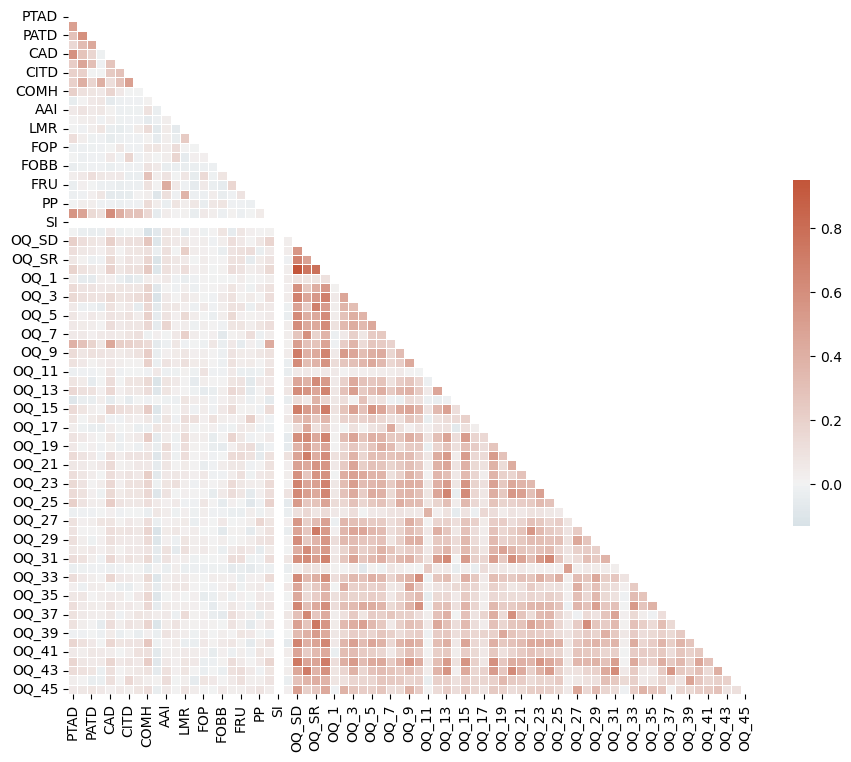

In [6]:
# Plotting correlation matrix

import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix without the ID, AppointID, and row columns

corr = no_id_renamed.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            # vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}
            )

In [12]:
# what proportion of the appointments exhibit SI?

print(df['SI'].value_counts(normalize=True))

# what proportion of the appointments have an SI of 0 verses not zero?

print(df['SI'].apply(lambda x: 1 if x > 0 else 0).value_counts(normalize=True))


# making a table that shows the proportion of every column and whether it is a 0 or not
results = []

# Iterate through each column in the DataFrame
for column in no_id.columns:
    # Apply the lambda function and get the value counts
    value_counts = no_id[column].apply(lambda x: 1 if x > 0 else 0).value_counts()
    
    # Get the counts of 1s and 0s
    count_1s = value_counts.get(1, 0)
    count_0s = value_counts.get(0, 0)
    
    # Append the results to the list
    results.append({'Column': column, 'Count of 1s': count_1s, 'Count of 0s': count_0s})

# Convert the results list to a DataFrame
counts_df = pd.DataFrame(results)

# Display the results but only the last two columns of the table

counts_df



SI
0.0    0.682284
1.0    0.200586
2.0    0.079063
3.0    0.030747
4.0    0.007321
Name: proportion, dtype: float64
SI
0    0.682284
1    0.317716
Name: proportion, dtype: float64


,Column,Count of 1s,Count of 0s
0,past_thoughts_about_death,47,636
1,past_thoughts_about_ways_to_die,12,671
2,past_attempts_to_try_to_die,7,676
3,past_hospitalizations_because_of_SI_or_SA,3,680
4,current_thoughts_about_death,33,650
...,...,...,...
68,OQ_41,537,146
69,OQ_42,623,60
70,OQ_43,610,73
71,OQ_44,151,532


In [7]:
# Removing all columns that start with "OQ_" but are not followed by a number

# This will remove all columns that start with "OQ_" but are not followed by a number
no_id = no_id.loc[:, ~no_id.columns.str.match(r'OQ_[^0-9]')]

# removing all question marks from the column names
no_id.columns = no_id.columns.str.replace('?', '', regex=False)

# removing OQpresent
no_id = no_id.loc[:, ~no_id.columns.str.match(r'OQpresent')]


### Now that we have done some data cleaning, we can start doing our modeling. First we'll do the train/test split

In [8]:
# First, remove all rows with NaN values from the dataset
no_id_clean = no_id.dropna()
print(f"Original dataset size: {len(no_id)}")
print(f"Clean dataset size after dropping NaN values: {len(no_id_clean)}")

# Define features (X) and target (y)
X_clean = no_id_clean.drop(['SI'], axis=1)
y_clean = no_id_clean['SI']

# Convert all non-zero values in y to 1 (binary classification)
y_binary = y_clean.apply(lambda x: 1 if x > 0 else 0)
print(f"Class distribution: 0 (No SI): {sum(y_binary == 0)}, 1 (SI): {sum(y_binary == 1)}")

# Calculate class imbalance ratio for reference
imbalance_ratio = sum(y_binary == 0) / sum(y_binary == 1)
print(f"Class imbalance ratio (negative:positive): {imbalance_ratio:.2f}:1")

# First split: separate out the test set (20% of data)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_clean, y_binary, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_binary
)

# Second split: divide the remaining data into training (80%) and validation (20%)
# This results in a 64%-16%-20% train-val-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_temp
)

# Print the sizes of all sets
print("\nData split sizes:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_clean)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_clean)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_clean)*100:.1f}%)")

# Verify class balance is maintained in all splits
print("\nClass distribution in splits:")
print(f"Training: 0: {sum(y_train == 0)}, 1: {sum(y_train == 1)}, Ratio: {sum(y_train == 0)/sum(y_train == 1):.2f}:1")
print(f"Validation: 0: {sum(y_val == 0)}, 1: {sum(y_val == 1)}, Ratio: {sum(y_val == 0)/sum(y_val == 1):.2f}:1")
print(f"Test: 0: {sum(y_test == 0)}, 1: {sum(y_test == 1)}, Ratio: {sum(y_test == 0)/sum(y_test == 1):.2f}:1")

# Note that we now have separate train, validation, and test sets
# X_train, y_train - For training models
# X_val, y_val - For hyperparameter tuning and model selection
# X_test, y_test - For final evaluation only

Original dataset size: 683
Clean dataset size after dropping NaN values: 675
Class distribution: 0 (No SI): 462, 1 (SI): 213
Class imbalance ratio (negative:positive): 2.17:1

Data split sizes:
Training set: 432 samples (64.0%)
Validation set: 108 samples (16.0%)
Test set: 135 samples (20.0%)

Class distribution in splits:
Training: 0: 296, 1: 136, Ratio: 2.18:1
Validation: 0: 74, 1: 34, Ratio: 2.18:1
Test: 0: 92, 1: 43, Ratio: 2.14:1



========== HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION ==========
Testing 27 hyperparameter combinations with 19 thresholds...


  4%|▎         | 1/27 [00:00<00:17,  1.46it/s]

100%|██████████| 27/27 [00:34<00:00,  1.28s/it]



Top 5 parameter combinations by average F1 score:
    max_depth  learning_rate  n_estimators  threshold  avg_f1_score
1           3           0.01           200       0.30      0.618031
2           3           0.01           300       0.25      0.616785
25          7           0.30           200       0.15      0.613548
15          5           0.30           100       0.20      0.613529
24          7           0.30           100       0.20      0.612829

Best hyperparameters and threshold:
max_depth: 3
learning_rate: 0.01
n_estimators: 200
threshold: 0.30
Best average F1 score: 0.6180

========== TRAINING FINAL MODEL WITH BEST PARAMETERS ==========

========== FINAL MODEL EVALUATION ==========


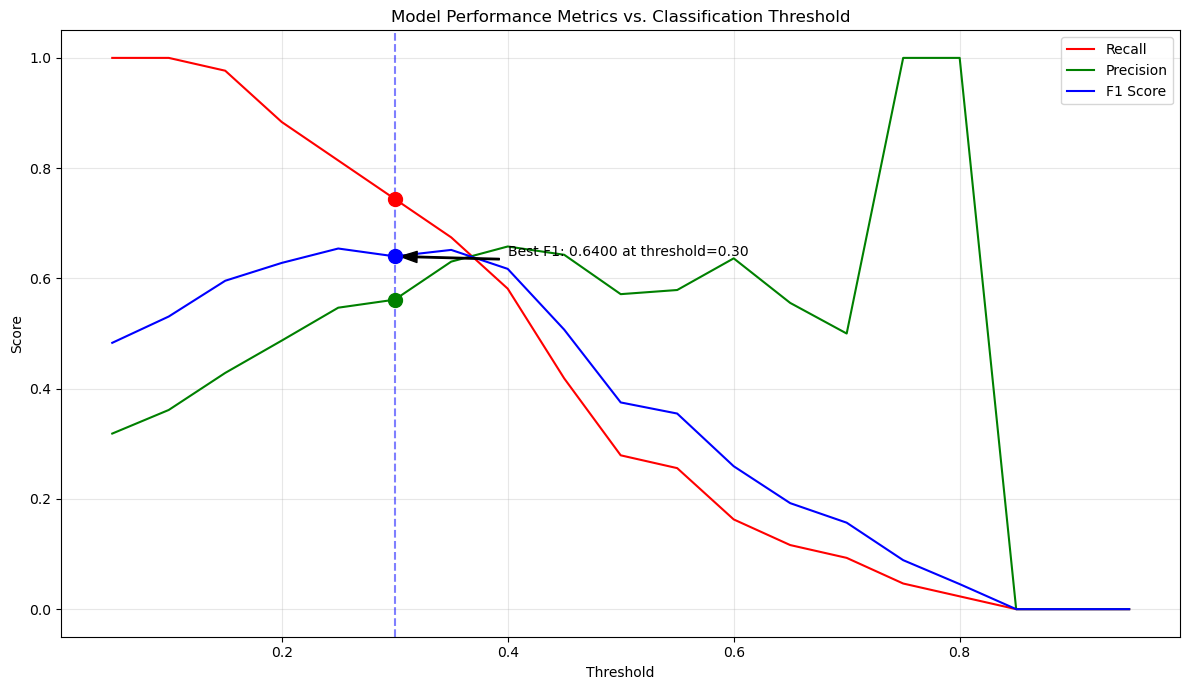

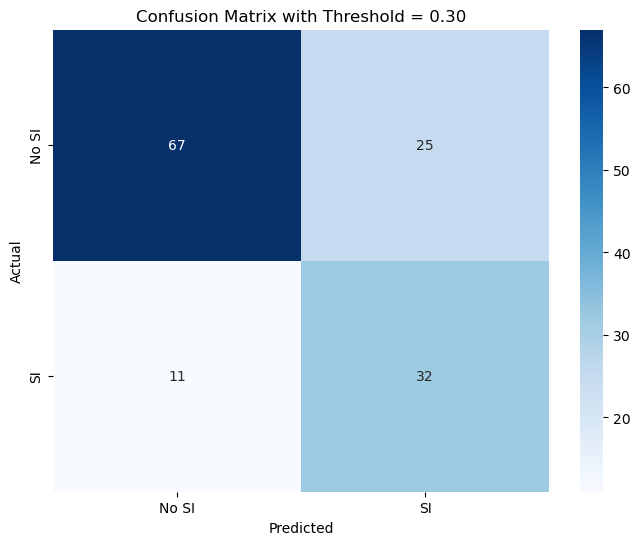


========== MODEL PERFORMANCE SUMMARY ==========
Best Hyperparameters: max_depth=3, learning_rate=0.01, n_estimators=200
Best Threshold: 0.30

Test Set Performance:
F1 Score: 0.6400
Recall: 0.7442
Precision: 0.5614
AUC-ROC: 0.8094

Confusion Matrix:
True Negatives: 67
False Positives: 25
False Negatives: 11
True Positives: 32


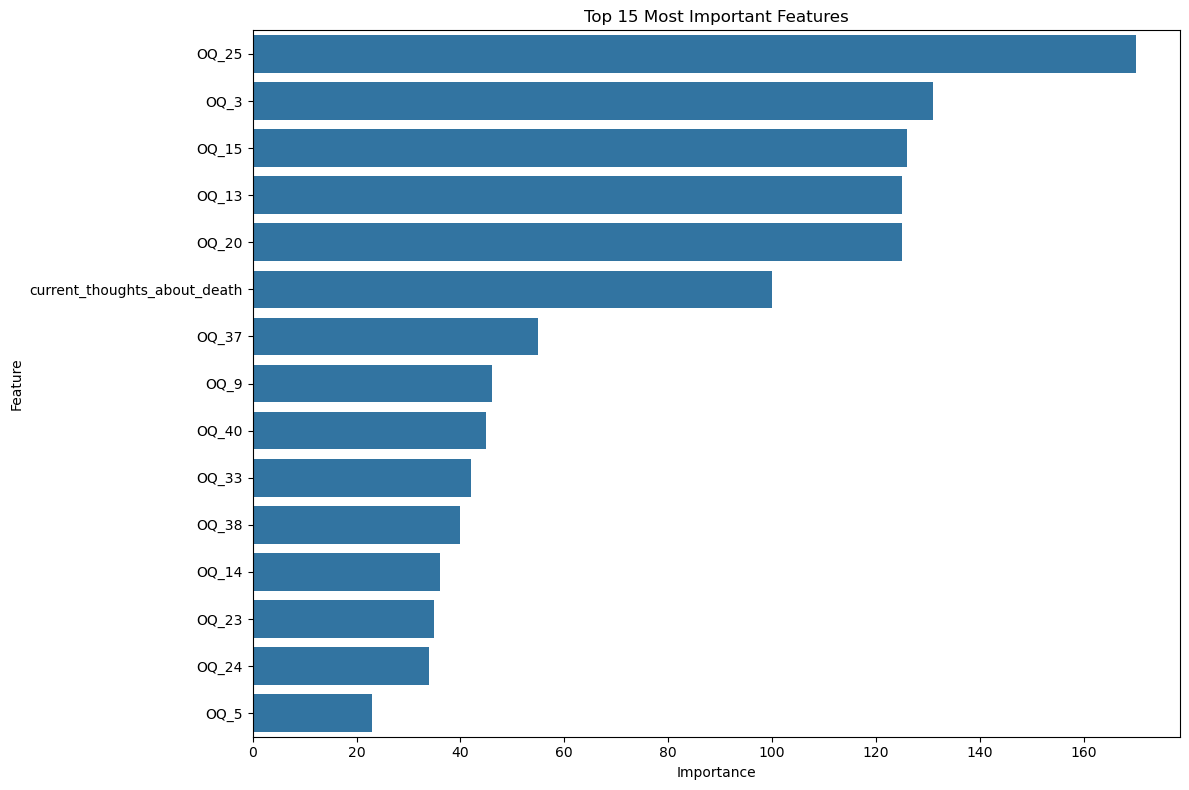


Top 10 Most Important Features:
                         Feature  Importance
45                         OQ_25       170.0
24                          OQ_3       131.0
35                         OQ_15       126.0
33                         OQ_13       125.0
40                         OQ_20       125.0
4   current_thoughts_about_death       100.0
57                         OQ_37        55.0
29                          OQ_9        46.0
60                         OQ_40        45.0
53                         OQ_33        42.0


In [12]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import itertools
from tqdm import tqdm

# Suppress all warnings
warnings.filterwarnings('ignore')

# For specific XGBoost warnings
import logging
logging.getLogger("xgboost").setLevel(logging.ERROR)

# ========== HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION ==========
print("\n========== HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION ==========")

# Define hyperparameter grid for the 3 most important parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['max_depth'],
    param_grid['learning_rate'],
    param_grid['n_estimators']
))

print(f"Testing {len(param_combinations)} hyperparameter combinations with {len(thresholds)} thresholds...")

# Combine train and validation sets for CV
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Track best parameters, threshold and score
best_avg_f1 = 0
best_params = None
best_threshold = None
results = []

# For each hyperparameter combination
for max_depth, learning_rate, n_estimators in tqdm(param_combinations):
    
    # Set parameters
    params = {
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
    }
    
    # Store F1 scores for each fold and threshold
    f1_scores = np.zeros((kfold.n_splits, len(thresholds)))
    
    # Perform k-fold cross-validation
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train_full, y_train_full)):
        # Split data
        X_fold_train, X_fold_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
        y_fold_train, y_fold_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]
        
        # Convert to DMatrix
        dtrain_fold = xgb.DMatrix(X_fold_train, label=y_fold_train)
        dval_fold = xgb.DMatrix(X_fold_val, label=y_fold_val)
        
        # Train model
        model = xgb.train(params, dtrain_fold, num_boost_round=n_estimators)
        
        # Get predictions
        val_probs = model.predict(dval_fold)
        
        # Evaluate each threshold
        for t_idx, threshold in enumerate(thresholds):
            y_pred = (val_probs >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_pred)
            f1_scores[fold, t_idx] = f1
    
    # Calculate average F1 score for each threshold across folds
    avg_f1_per_threshold = np.mean(f1_scores, axis=0)
    best_t_idx = np.argmax(avg_f1_per_threshold)
    best_t = thresholds[best_t_idx]
    best_t_f1 = avg_f1_per_threshold[best_t_idx]
    
    # Store results
    results.append({
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'threshold': best_t,
        'avg_f1_score': best_t_f1
    })
    
    # Update best parameters if better average F1 score found
    if best_t_f1 > best_avg_f1:
        best_avg_f1 = best_t_f1
        best_params = {
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators
        }
        best_threshold = best_t

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop 5 parameter combinations by average F1 score:")
print(results_df.sort_values('avg_f1_score', ascending=False).head(5))

print("\nBest hyperparameters and threshold:")
print(f"max_depth: {best_params['max_depth']}")
print(f"learning_rate: {best_params['learning_rate']}")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"threshold: {best_threshold:.2f}")
print(f"Best average F1 score: {best_avg_f1:.4f}")

# ========== TRAIN FINAL MODEL WITH BEST PARAMETERS ==========
print("\n========== TRAINING FINAL MODEL WITH BEST PARAMETERS ==========")
# Create final training set (combining train and validation)
X_train_final = pd.concat([X_train, X_val])
y_train_final = pd.concat([y_train, y_val])

# Convert to DMatrix
dtrain_final = xgb.DMatrix(X_train_final, label=y_train_final)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set best parameters for final model
final_params = {
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# Train final model
final_model = xgb.train(
    final_params, 
    dtrain_final, 
    num_boost_round=best_params['n_estimators']
)

# ========== EVALUATE ON TEST SET ==========
print("\n========== FINAL MODEL EVALUATION ==========")
# Get predictions on test set
test_probs = final_model.predict(dtest)

# Apply best threshold
test_preds = (test_probs >= best_threshold).astype(int)

# Calculate metrics
recall = recall_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, zero_division=0)
f1 = f1_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)
auc_roc = roc_auc_score(y_test, test_probs)

# ========== VISUALIZATION ==========
# Calculate metrics for all thresholds on test set for the plot
threshold_metrics = {
    'threshold': [],
    'recall': [],
    'precision': [],
    'f1': [],
    'tn': [],
    'fp': [],
    'fn': [],
    'tp': []
}

for threshold in thresholds:
    # Apply threshold
    y_pred = (test_probs >= threshold).astype(int)
    
    # Calculate metrics
    threshold_recall = recall_score(y_test, y_pred)
    threshold_precision = precision_score(y_test, y_pred, zero_division=0)
    threshold_f1 = f1_score(y_test, y_pred)
    threshold_cm = confusion_matrix(y_test, y_pred)
    
    # Store metrics
    threshold_metrics['threshold'].append(threshold)
    threshold_metrics['recall'].append(threshold_recall)
    threshold_metrics['precision'].append(threshold_precision)
    threshold_metrics['f1'].append(threshold_f1)
    threshold_metrics['tn'].append(threshold_cm[0, 0])
    threshold_metrics['fp'].append(threshold_cm[0, 1])
    threshold_metrics['fn'].append(threshold_cm[1, 0])
    threshold_metrics['tp'].append(threshold_cm[1, 1])

# Create DataFrame from metrics
metrics_df = pd.DataFrame(threshold_metrics)

# Plot metrics vs threshold
plt.figure(figsize=(12, 7))
plt.plot(metrics_df['threshold'], metrics_df['recall'], 'r-', label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'], 'g-', label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['f1'], 'b-', label='F1 Score')

# Mark best threshold
plt.axvline(x=best_threshold, color='blue', linestyle='--', alpha=0.5)
plt.scatter(best_threshold, f1, color='blue', s=100, zorder=5)
plt.scatter(best_threshold, recall, color='red', s=100, zorder=5)
plt.scatter(best_threshold, precision, color='green', s=100, zorder=5)

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics vs. Classification Threshold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.annotate(f'Best F1: {f1:.4f} at threshold={best_threshold:.2f}',
             xy=(best_threshold, f1),
             xytext=(best_threshold+0.1, f1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10)
plt.tight_layout()
plt.show()

# Create confusion matrix with best threshold
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix with Threshold = {best_threshold:.2f}')
plt.show()

# ========== PERFORMANCE SUMMARY ==========
print("\n========== MODEL PERFORMANCE SUMMARY ==========")
print(f"Best Hyperparameters: max_depth={best_params['max_depth']}, "
      f"learning_rate={best_params['learning_rate']}, "
      f"n_estimators={best_params['n_estimators']}")
print(f"Best Threshold: {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Print confusion matrix components
print("\nConfusion Matrix:")
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")

# ========== FEATURE IMPORTANCE ==========
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': [final_model.get_score(importance_type='weight').get(f, 0) for f in X_clean.columns]
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Now that we have a model that we are using, we can use SHAP to see how important every feature is in predicting SI

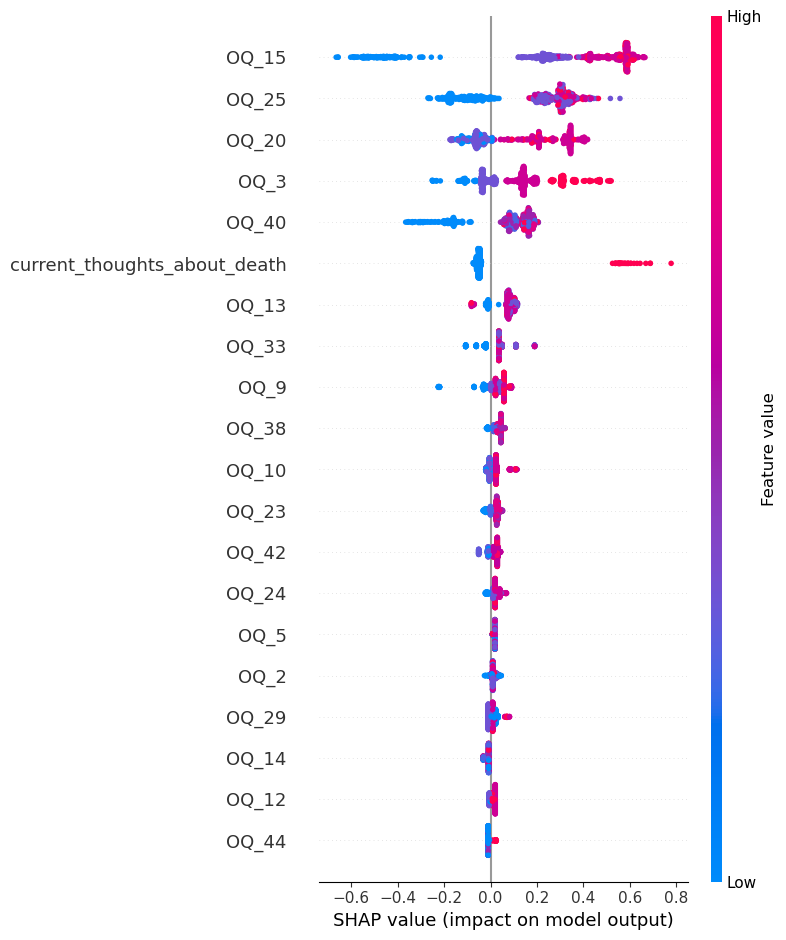

In [14]:
# getting beeswarm plot from shap using xgb_class
import shap

# Create the explainer
explainer = shap.Explainer(final_model)

# Calculate the SHAP values
shap_values = explainer(X_clean)

# Create the summary plot
shap.summary_plot(shap_values, X_clean)

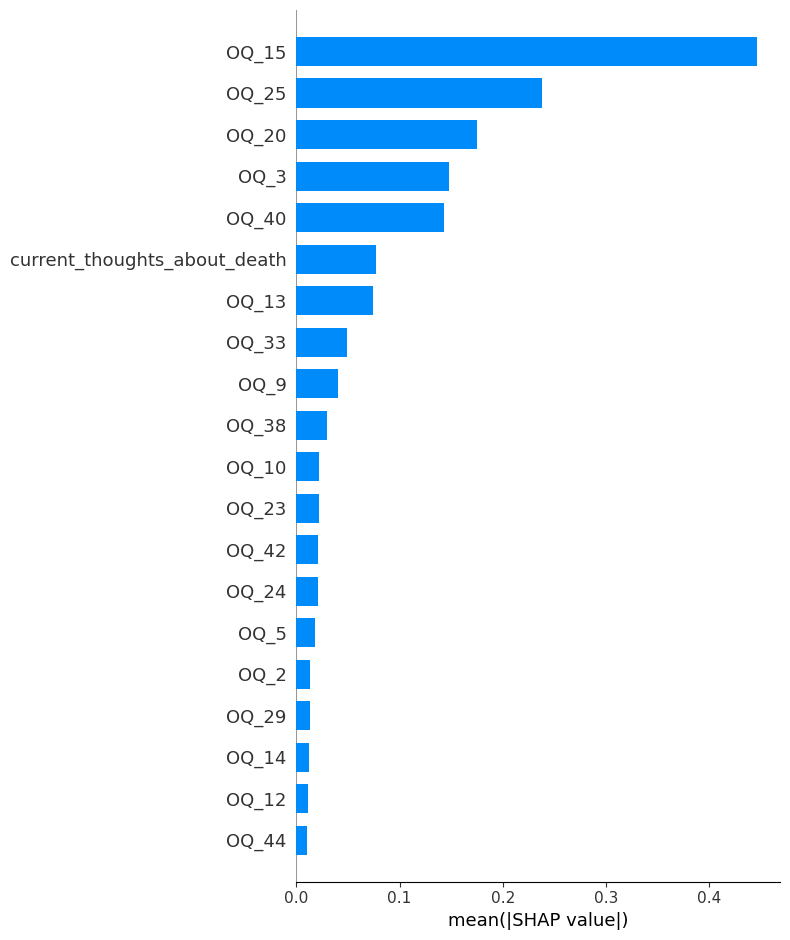

In [15]:
import matplotlib.pyplot as plt
# identifying the most important features

shap.summary_plot(shap_values, X_test, plot_type='bar',show=False)

# Get the current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Customize the x-axis label
ax.set_xlabel('mean(|SHAP value|)')

# Show the plot
plt.show()


========== HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION ==========
Testing 27 hyperparameter combinations with 19 thresholds each...


  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:07<00:00,  3.59it/s]



Top 5 hyperparameter-threshold combinations by F1 score:
    num_leaves  learning_rate  n_estimators  best_threshold  f1_score
0           20           0.01           100             0.2  0.553571
9           31           0.01           100             0.2  0.553571
18          50           0.01           100             0.2  0.553571
11          31           0.01           300             0.1  0.547009
20          50           0.01           300             0.1  0.547009

Best hyperparameters and threshold:
num_leaves: 20
learning_rate: 0.01
n_estimators: 100
Best threshold: 0.20
Best validation F1 score: 0.5536

========== TRAINING FINAL MODEL WITH BEST PARAMETERS ==========

========== EVALUATING ON TEST SET (THRESHOLD = 0.20) ==========
Test Results with threshold=0.20:
F1 Score: 0.6250
Recall: 0.9302
Precision: 0.4706


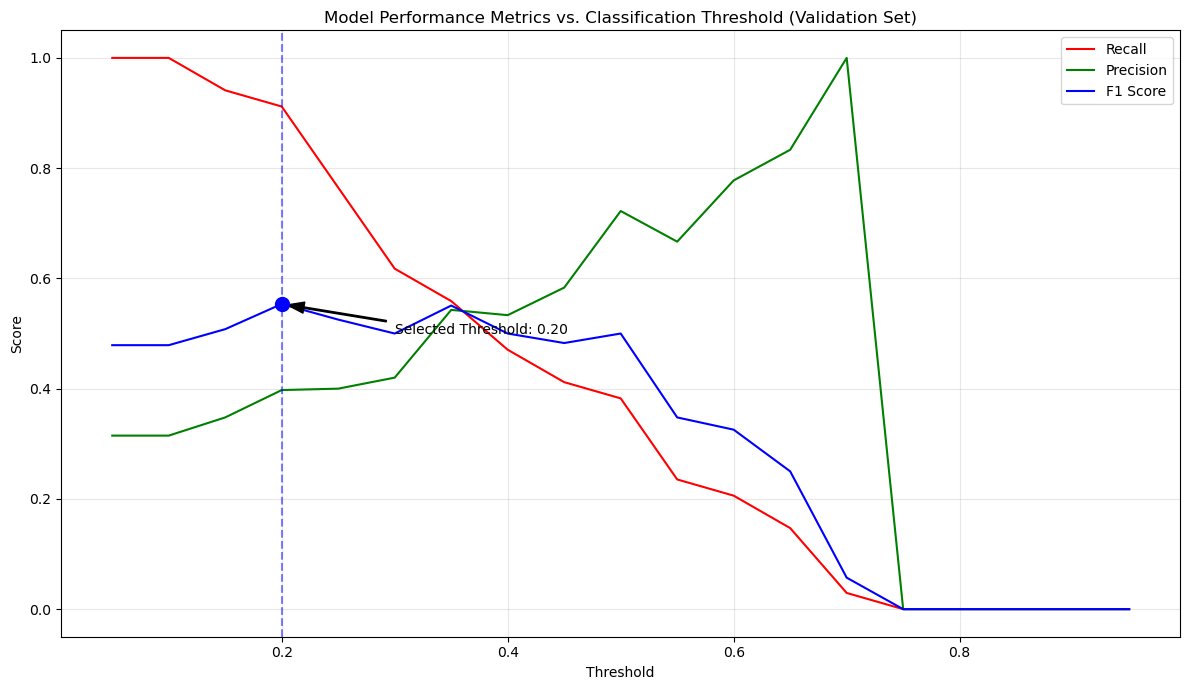

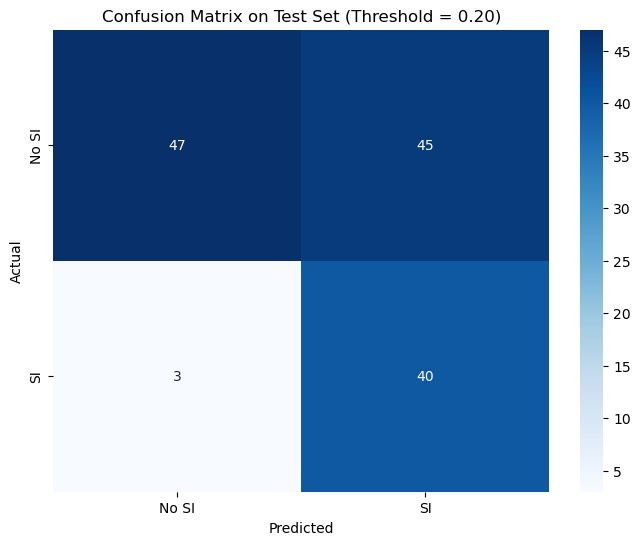

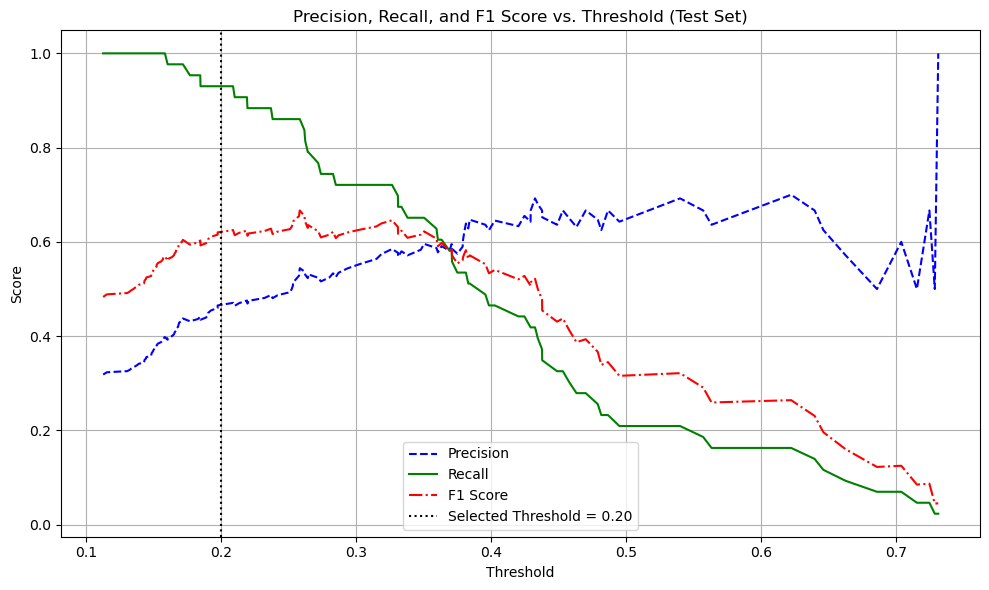


========== MODEL PERFORMANCE SUMMARY ==========
Best Hyperparameters: num_leaves=20, learning_rate=0.01, n_estimators=100
Best Threshold: 0.20

Test Set Performance:
F1 Score: 0.6250
Recall: 0.9302
Precision: 0.4706

AUC-ROC: 0.8031

Confusion Matrix on Test Set:
True Negatives: 47
False Positives: 45
False Negatives: 3
True Positives: 40

========== FEATURE IMPORTANCE ==========


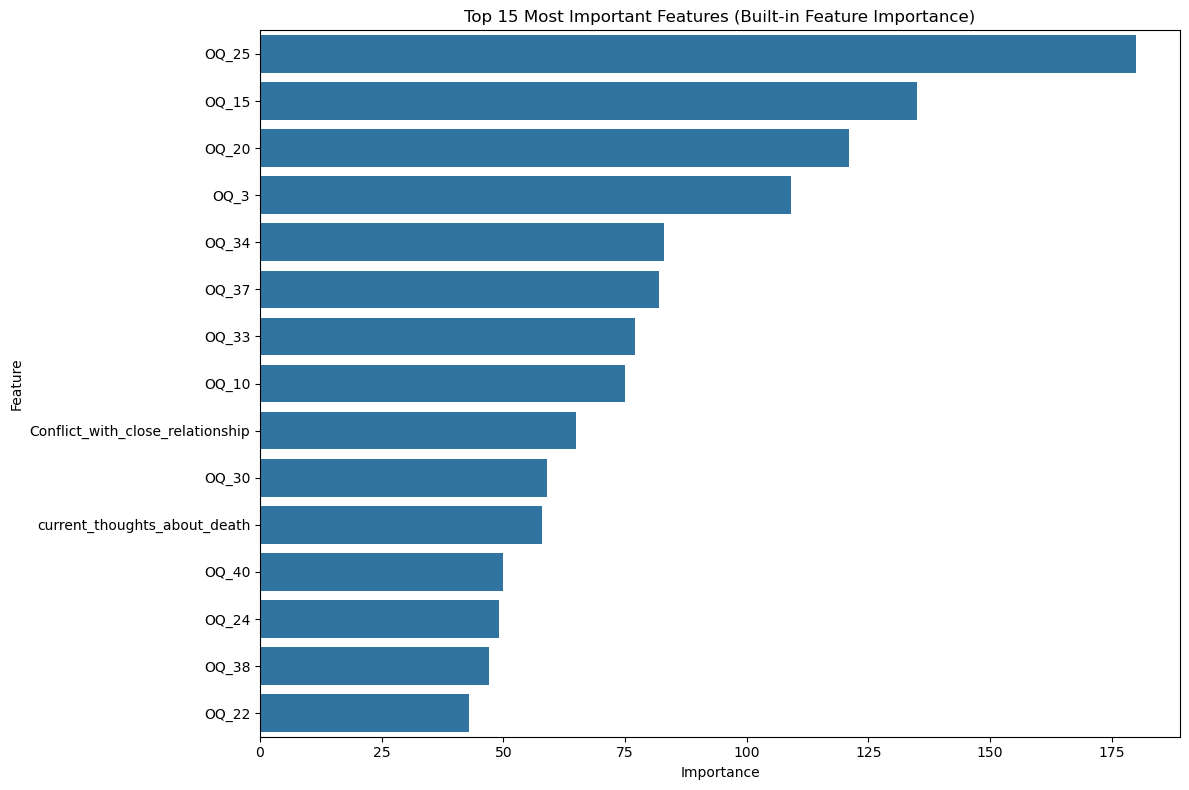


Top 10 Most Important Features:
                             Feature  Importance
45                             OQ_25         180
35                             OQ_15         135
40                             OQ_20         121
24                              OQ_3         109
54                             OQ_34          83
57                             OQ_37          82
53                             OQ_33          77
30                             OQ_10          75
19  Conflict_with_close_relationship          65
50                             OQ_30          59

Calculating SHAP values for feature importance analysis...


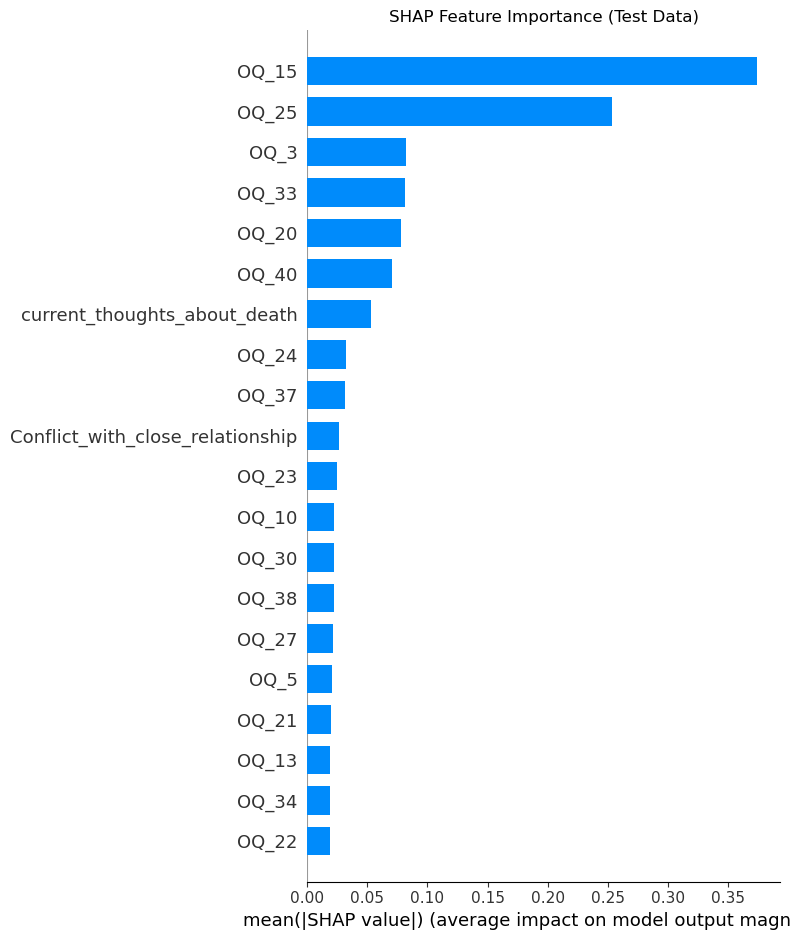

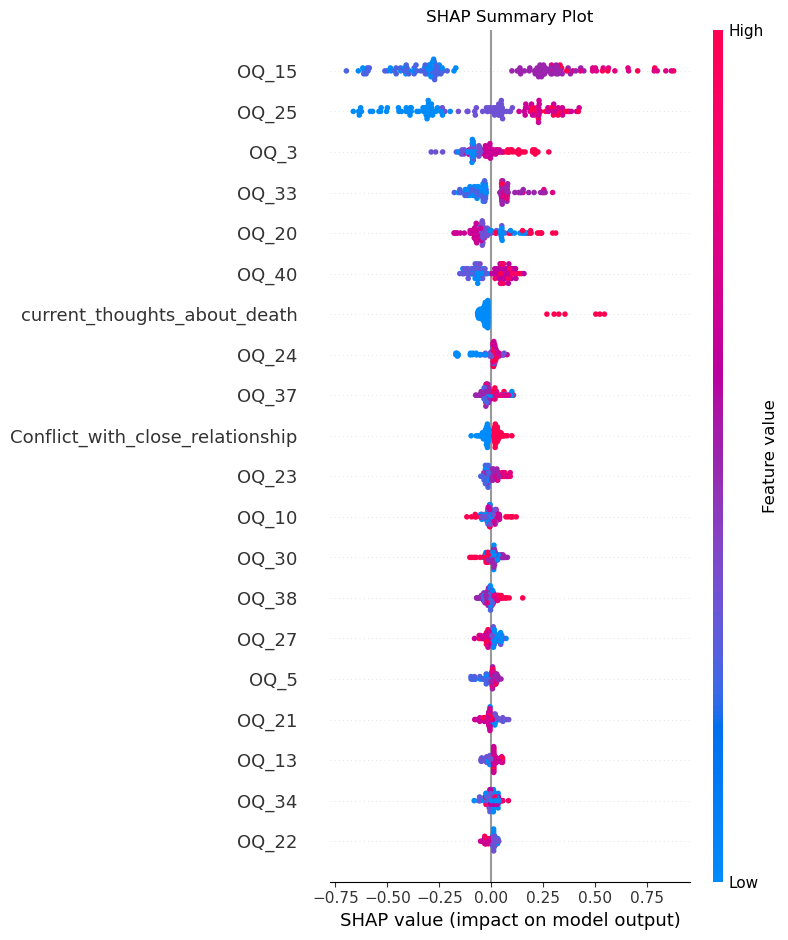

In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_curve
import itertools
from tqdm import tqdm

# Suppress all warnings
warnings.filterwarnings('ignore')

# ========== HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION ==========
print("\n========== HYPERPARAMETER TUNING WITH THRESHOLD OPTIMIZATION ==========")

# Define hyperparameter grid for the 3 most important parameters
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['num_leaves'],
    param_grid['learning_rate'],
    param_grid['n_estimators']
))

print(f"Testing {len(param_combinations)} hyperparameter combinations with {len(thresholds)} thresholds each...")

# Track best parameters, threshold, and score
best_f1 = 0
best_params = None
best_threshold = 0.5
results = []

# Test each combination
for num_leaves, learning_rate, n_estimators in tqdm(param_combinations):
    
    # Set parameters
    params = {
        'num_leaves': num_leaves,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'objective': 'binary',
        'metric': 'auc',
        'verbose': -1
    }
    
    # Train model
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    
    # Make probability predictions on validation set
    val_probs = model.predict_proba(X_val)[:, 1]
    
    # Test different thresholds to find the best one for this model
    threshold_results = []
    
    for threshold in thresholds:
        # Apply threshold
        y_pred_val = (val_probs >= threshold).astype(int)
        
        # Calculate metrics
        val_f1 = f1_score(y_val, y_pred_val)
        val_recall = recall_score(y_val, y_pred_val)
        val_precision = precision_score(y_val, y_pred_val, zero_division=0)
        
        threshold_results.append({
            'threshold': threshold,
            'f1_score': val_f1,
            'recall': val_recall,
            'precision': val_precision
        })
    
    # Find the best threshold for this model
    threshold_df = pd.DataFrame(threshold_results)
    best_idx = threshold_df['f1_score'].idxmax()
    model_best_threshold = threshold_df.loc[best_idx, 'threshold']
    model_best_f1 = threshold_df.loc[best_idx, 'f1_score']
    
    # Store result
    results.append({
        'num_leaves': num_leaves,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'best_threshold': model_best_threshold,
        'f1_score': model_best_f1
    })
    
    # Update best parameters if better F1 score found
    if model_best_f1 > best_f1:
        best_f1 = model_best_f1
        best_threshold = model_best_threshold
        best_params = {
            'num_leaves': num_leaves,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators
        }

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop 5 hyperparameter-threshold combinations by F1 score:")
print(results_df.sort_values('f1_score', ascending=False).head(5))

print("\nBest hyperparameters and threshold:")
print(f"num_leaves: {best_params['num_leaves']}")
print(f"learning_rate: {best_params['learning_rate']}")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"Best threshold: {best_threshold:.2f}")
print(f"Best validation F1 score: {best_f1:.4f}")

# ========== TRAIN FINAL MODEL WITH BEST PARAMETERS ==========
print("\n========== TRAINING FINAL MODEL WITH BEST PARAMETERS ==========")
# Create final training set (combining train and validation)
X_train_final = pd.concat([X_train, X_val])
y_train_final = pd.concat([y_train, y_val])

# Set best parameters for final model
final_params = {
    'num_leaves': best_params['num_leaves'],
    'learning_rate': best_params['learning_rate'],
    'n_estimators': best_params['n_estimators'],
    'objective': 'binary',
    'metric': 'auc',
    'verbose': -1
}

# Train final model
final_model = LGBMClassifier(**final_params)
final_model.fit(X_train_final, y_train_final)

# ========== EVALUATE ON TEST SET USING BEST THRESHOLD ==========
print(f"\n========== EVALUATING ON TEST SET (THRESHOLD = {best_threshold:.2f}) ==========")
# Get predictions on test set
test_probs = final_model.predict_proba(X_test)[:, 1]

# Apply the best threshold found during cross-validation
y_pred_test = (test_probs >= best_threshold).astype(int)

# Calculate metrics
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_f1 = f1_score(y_test, y_pred_test)
test_cm = confusion_matrix(y_test, y_pred_test)

# Store confusion matrix components
if test_cm.shape == (2, 2):
    tn, fp, fn, tp = test_cm.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0

print(f"Test Results with threshold={best_threshold:.2f}:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# ========== VISUALIZATION ==========
# Plot metrics vs threshold for the best model (for reference)
# First, regenerate the model with best parameters on the original training set
best_model = LGBMClassifier(**final_params)
best_model.fit(X_train, y_train)
val_probs = best_model.predict_proba(X_val)[:, 1]

# Calculate metrics for each threshold for visualization
threshold_metrics = {
    'threshold': [],
    'recall': [],
    'precision': [],
    'f1': [],
    'tn': [],
    'fp': [],
    'fn': [],
    'tp': []
}

for threshold in thresholds:
    # Apply threshold
    y_pred_val = (val_probs >= threshold).astype(int)
    
    # Calculate metrics
    recall = recall_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, zero_division=0)
    f1 = f1_score(y_val, y_pred_val)
    cm = confusion_matrix(y_val, y_pred_val)
    
    # Store metrics
    threshold_metrics['threshold'].append(threshold)
    threshold_metrics['recall'].append(recall)
    threshold_metrics['precision'].append(precision)
    threshold_metrics['f1'].append(f1)
    
    # Store confusion matrix elements
    if cm.shape == (2, 2):
        threshold_metrics['tn'].append(cm[0, 0])
        threshold_metrics['fp'].append(cm[0, 1])
        threshold_metrics['fn'].append(cm[1, 0])
        threshold_metrics['tp'].append(cm[1, 1])
    else:
        # Handle case where one class might be missing in predictions
        threshold_metrics['tn'].append(0)
        threshold_metrics['fp'].append(0)
        threshold_metrics['fn'].append(0)
        threshold_metrics['tp'].append(0)

# Create DataFrame from metrics
metrics_df = pd.DataFrame(threshold_metrics)

# Plot metrics vs threshold
plt.figure(figsize=(12, 7))
plt.plot(metrics_df['threshold'], metrics_df['recall'], 'r-', label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'], 'g-', label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['f1'], 'b-', label='F1 Score')

# Mark best F1 threshold
plt.axvline(x=best_threshold, color='blue', linestyle='--', alpha=0.5)
plt.scatter(best_threshold, metrics_df['f1'][metrics_df['threshold'] == best_threshold].values[0] 
            if any(metrics_df['threshold'] == best_threshold) else 0, 
            color='blue', s=100, zorder=5)

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics vs. Classification Threshold (Validation Set)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.annotate(f'Selected Threshold: {best_threshold:.2f}',
             xy=(best_threshold, metrics_df['f1'][metrics_df['threshold'] == best_threshold].values[0]
                 if any(metrics_df['threshold'] == best_threshold) else 0),
             xytext=(best_threshold+0.1, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10)
plt.tight_layout()
plt.show()

# Create confusion matrix using the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on Test Set (Threshold = {best_threshold:.2f})')
plt.show()

# Create precision-recall curve for test set
plt.figure(figsize=(10, 6))
precision, recall, thresholds_pr = precision_recall_curve(y_test, test_probs)

# Calculate F1 score for each threshold
f1_scores = [2 * p * r / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision[:-1], recall[:-1])]

# Plot precision, recall, and F1 curves
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds_pr, f1_scores, 'r-.', label='F1 Score')

# Mark the selected threshold
plt.axvline(x=best_threshold, color='k', linestyle=':', 
           label=f'Selected Threshold = {best_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== PERFORMANCE SUMMARY ==========
print("\n========== MODEL PERFORMANCE SUMMARY ==========")
print(f"Best Hyperparameters: num_leaves={best_params['num_leaves']}, "
      f"learning_rate={best_params['learning_rate']}, "
      f"n_estimators={best_params['n_estimators']}")
print(f"Best Threshold: {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, test_probs)
print(f"\nAUC-ROC: {auc_roc:.4f}")

# Print confusion matrix components
print("\nConfusion Matrix on Test Set:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# ========== FEATURE IMPORTANCE ==========
print("\n========== FEATURE IMPORTANCE ==========")
# Standard feature importance
feature_importance = pd.DataFrame({
    'Feature': X_clean.columns,
    'Importance': final_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features (Built-in Feature Importance)')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Calculate SHAP values
print("\nCalculating SHAP values for feature importance analysis...")
explainer = shap.TreeExplainer(final_model)

# Use a sample of the dataset for SHAP analysis if the dataset is large
if X_test.shape[0] > 1000:
    shap_sample = X_test.sample(1000, random_state=42)
    shap_values = explainer.shap_values(shap_sample)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, shap_sample, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance (Sampled Test Data)')
    plt.tight_layout()
    plt.show()
else:
    shap_values = explainer.shap_values(X_test)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance (Test Data)')
    plt.tight_layout()
    plt.show()

# Create SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test if X_test.shape[0] <= 1000 else shap_sample, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

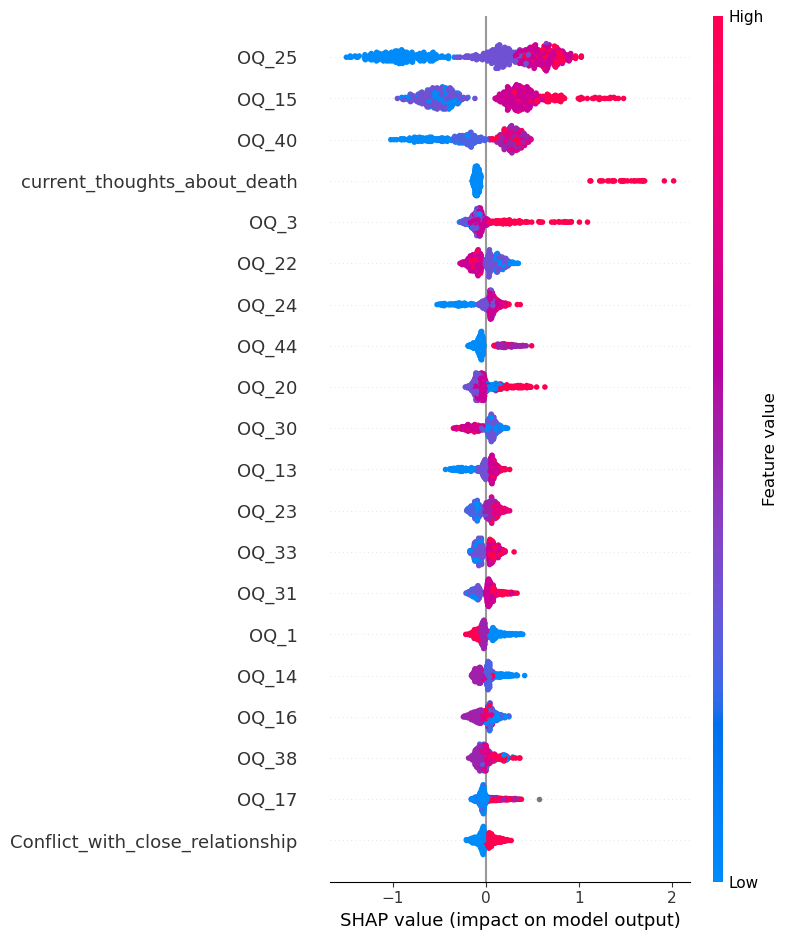

In [19]:
# getting beeswarm plot from shap using lgbm_model

# Create the explainer
explainer = shap.Explainer(final_model)

# Calculate the SHAP values
shap_values = explainer(X)

# Create the summary plot
shap.summary_plot(shap_values, X)

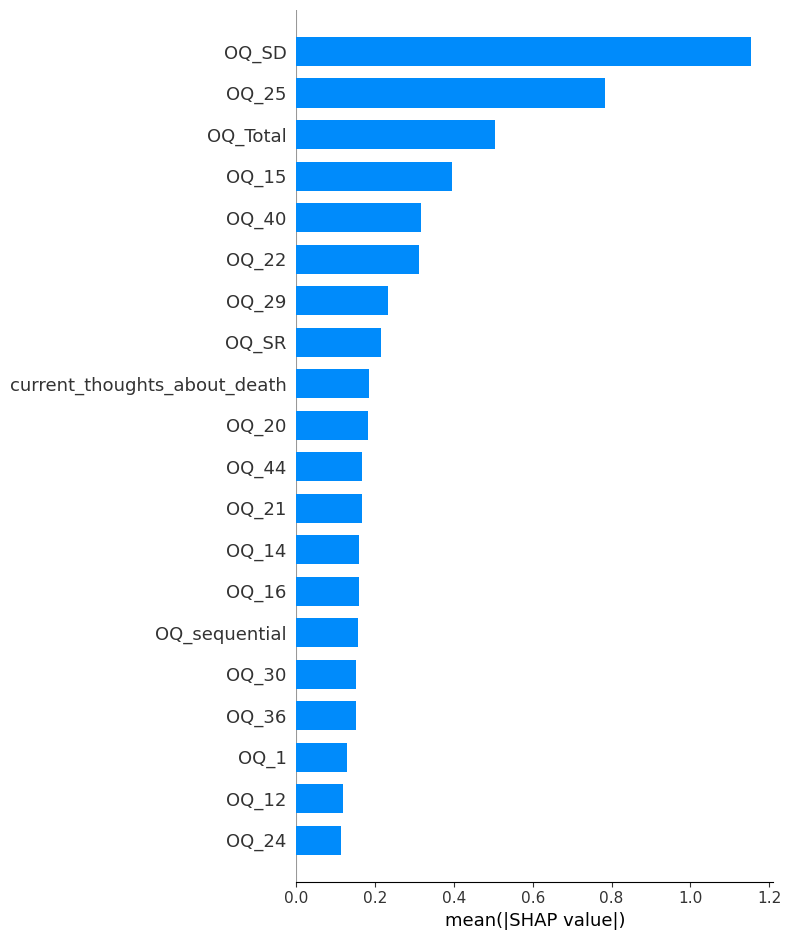

In [18]:
shap.summary_plot(shap_values, X_test, plot_type='bar',show=False)

# Get the current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Customize the x-axis label
ax.set_xlabel('mean(|SHAP value|)')

# Show the plot
plt.show()

#### This next portion I'm going to fit a logistic regression model with and without the text portions of the data and then perform a LRT to see if the text data adds any significant information

In [29]:
no_id['SI'].unique()

array([0., 2., 1., 3., 4.])

In [9]:
# Fitting two logistic regression models, one with all features (OQ + text), and one with only the OQ features
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Drop rows with NaN values
no_id_clean = no_id.dropna()

# Convert SI: any value that isn't 0 becomes 1
print("Unique values in SI before conversion:", no_id_clean['SI'].unique())
no_id_clean['SI'] = np.where(no_id_clean['SI'] == 0, 0, 1).astype(float)

# Identify OQ features (survey data)
oq_features = [col for col in no_id_clean.columns if col.startswith('OQ_')]

# Identify all predictors (excluding the target variable 'SI')
all_features = [col for col in no_id_clean.columns if col != 'SI']

# Create X and y for both models
X_oq = no_id_clean[oq_features]
X_all = no_id_clean[all_features]
y = no_id_clean['SI']

# Model 1: OQ features only
model_oq = sm.Logit(y, sm.add_constant(X_oq))
result_oq = model_oq.fit(disp=0)
print("Model with OQ features only:")
print(result_oq.summary())
ll_oq = result_oq.llf  # Log-likelihood of OQ model

# Model 2: All features (OQ + text)
model_all = sm.Logit(y, sm.add_constant(X_all))
result_all = model_all.fit(disp=0)
print("\nModel with all features (OQ + text):")
print(result_all.summary())
ll_all = result_all.llf  # Log-likelihood of full model

# Likelihood Ratio Test
# LR = -2 * (ll_restricted - ll_full)
lr_stat = -2 * (ll_oq - ll_all)
# Degrees of freedom = difference in number of parameters
df_diff = len(all_features) - len(oq_features)
# P-value
p_value = stats.chi2.sf(lr_stat, df_diff)

print("\nLikelihood Ratio Test:")
print(f"LR statistic: {lr_stat:.4f}")
print(f"Degrees of freedom: {df_diff}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("The text data adds significant predictive information (p < 0.05)")
else:
    print("The text data does not add significant predictive information (p >= 0.05)")

# Optional: Compare prediction performance
y_pred_oq = result_oq.predict(sm.add_constant(X_oq))
y_pred_all = result_all.predict(sm.add_constant(X_all))

print("\nModel with OQ features only - ROC AUC:", roc_auc_score(y, y_pred_oq))
print("Model with all features - ROC AUC:", roc_auc_score(y, y_pred_all))

Unique values in SI before conversion: [0. 2. 1. 3. 4.]
Model with OQ features only:
                           Logit Regression Results                           
Dep. Variable:                     SI   No. Observations:                  675
Model:                          Logit   Df Residuals:                      630
Method:                           MLE   Df Model:                           44
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.2909
Time:                        17:23:47   Log-Likelihood:                -298.44
converged:                       True   LL-Null:                       -420.84
Covariance Type:            nonrobust   LLR p-value:                 1.138e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2681      0.496     -6.595      0.000      -4.239      -2.297
OQ_1          -0.2695      0.108     -2.503   

/yunity/sps58/miniconda3/envs/llama/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



========== FEATURE IMPORTANCE ==========


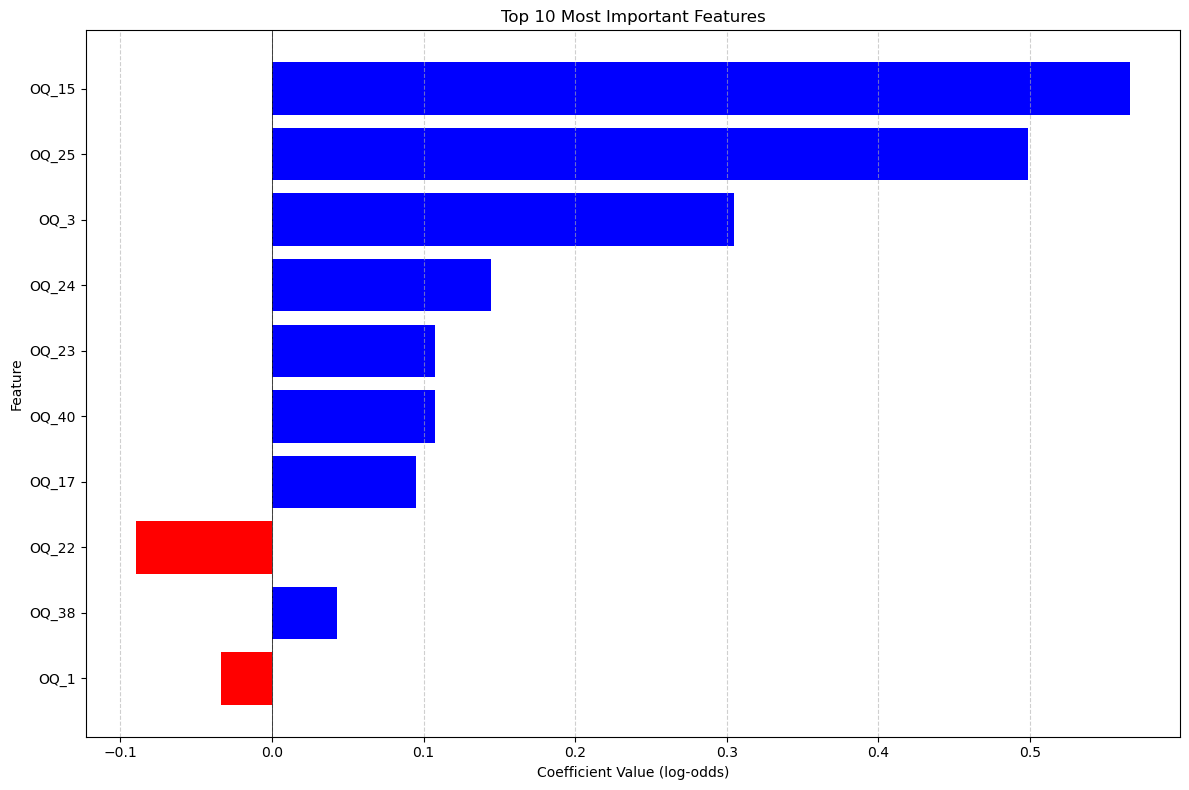


Top 10 Most Important Features:
   Feature  Coefficient
35   OQ_15     0.566103
45   OQ_25     0.498812
24    OQ_3     0.304633
44   OQ_24     0.144443
43   OQ_23     0.107450
60   OQ_40     0.107213
37   OQ_17     0.095055
42   OQ_22    -0.090037
58   OQ_38     0.042830
22    OQ_1    -0.033556


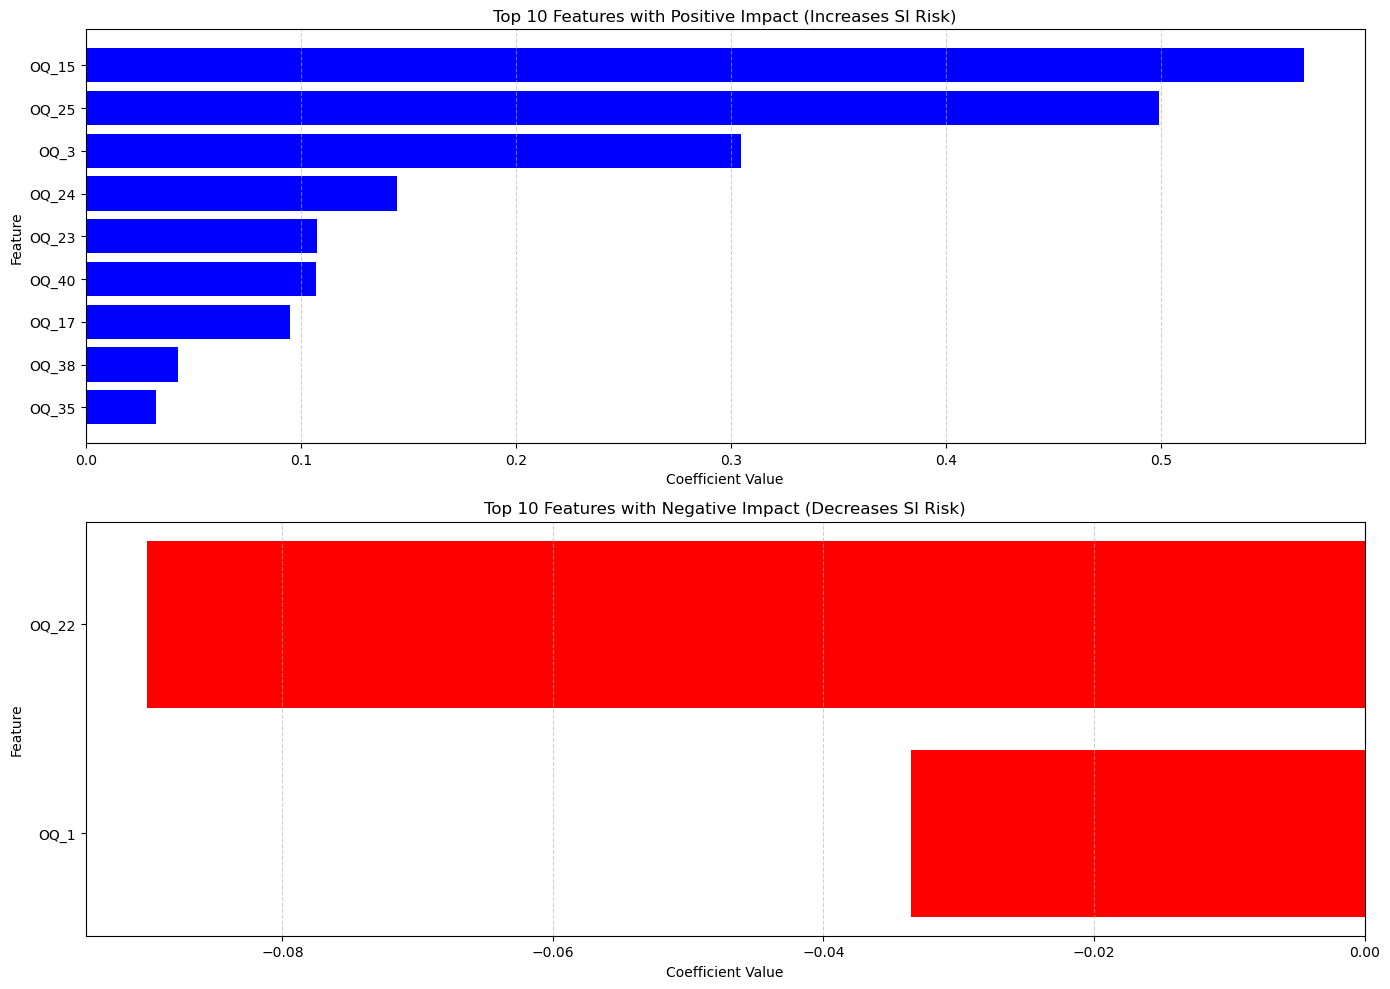

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix,
                            classification_report, roc_auc_score, precision_recall_curve)
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import warnings
from sklearn.preprocessing import StandardScaler
# Suppress warnings
warnings.filterwarnings('ignore')

# Add feature scaling function for OQ_ features
def scale_oq_features(X_train, X_test=None, X_val=None):
    """
    Scale features that start with 'OQ_' using StandardScaler
    
    Parameters:
    - X_train: Training features DataFrame
    - X_test: Test features DataFrame (optional)
    - X_val: Validation features DataFrame (optional)
    
    Returns:
    - Scaled DataFrames in same order as input
    """
    # Create a copy of the DataFrames to avoid modifying originals
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy() if X_test is not None else None
    X_val_scaled = X_val.copy() if X_val is not None else None
    
    # Get list of OQ_ features
    oq_features = [col for col in X_train.columns if col.startswith('OQ_')]
    
    if len(oq_features) > 0:
        print(f"Scaling {len(oq_features)} OQ_ features...")
        
        # Initialize scaler
        scaler = StandardScaler()
        
        # Fit scaler on training data and transform
        X_train_scaled[oq_features] = scaler.fit_transform(X_train[oq_features])
        
        # Transform test data if provided
        if X_test is not None:
            X_test_scaled[oq_features] = scaler.transform(X_test[oq_features])
        
        # Transform validation data if provided
        if X_val is not None:
            X_val_scaled[oq_features] = scaler.transform(X_val[oq_features])
    else:
        print("No OQ_ features found to scale")
    
    if X_test is not None and X_val is not None:
        return X_train_scaled, X_test_scaled, X_val_scaled
    elif X_test is not None:
        return X_train_scaled, X_test_scaled
    else:
        return X_train_scaled

# Apply scaling to features before training models
# This should be added right after your train/test split
# Assuming you already have X_train and X_test
X_train, X_test = scale_oq_features(X_train, X_test)

# ========== HYPERPARAMETER TUNING WITH 5-FOLD CROSS-VALIDATION AND THRESHOLD OPTIMIZATION ==========
print("\n========== HYPERPARAMETER TUNING WITH 5-FOLD CROSS-VALIDATION AND THRESHOLD OPTIMIZATION ==========")

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers support both l1 and l2
}

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['C'],
    param_grid['penalty'],
    param_grid['solver']
))

print(f"Testing {len(param_combinations)} hyperparameter combinations with {len(thresholds)} thresholds across 5 folds...")

# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Track best parameters, threshold and score
best_avg_f1 = 0
best_params = None
best_threshold = 0.5
results = []

# Test each combination
for C, penalty, solver in tqdm(param_combinations):
    
    try:
        # Initialize model with current hyperparameters
        model = LogisticRegression(
            C=C,
            penalty=penalty,
            solver=solver,
            max_iter=1000,
            random_state=42
        )
        
        # Track threshold performance across folds
        threshold_f1_scores = {t: [] for t in thresholds}
        
        # Perform k-fold cross-validation
        for train_idx, val_idx in kf.split(X_train):
            # Split data for this fold
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # Scale OQ features if needed
            X_fold_train, X_fold_val = scale_oq_features(X_fold_train, X_fold_val)
            
            # Fit model
            model.fit(X_fold_train, y_fold_train)
            
            # Get probabilities for validation set
            y_fold_probs = model.predict_proba(X_fold_val)[:, 1]
            
            # Try different thresholds
            for threshold in thresholds:
                # Apply threshold
                y_fold_pred = (y_fold_probs >= threshold).astype(int)
                
                # Calculate F1 score
                fold_f1 = f1_score(y_fold_val, y_fold_pred)
                
                # Store this threshold's performance for this fold
                threshold_f1_scores[threshold].append(fold_f1)
        
        # Calculate average F1 score for each threshold across all folds
        avg_f1_by_threshold = {t: np.mean(scores) for t, scores in threshold_f1_scores.items()}
        
        # Find best threshold for this model
        best_model_threshold = max(avg_f1_by_threshold, key=avg_f1_by_threshold.get)
        best_model_f1 = avg_f1_by_threshold[best_model_threshold]
        
        # Store result
        results.append({
            'C': C,
            'penalty': penalty,
            'solver': solver,
            'threshold': best_model_threshold,
            'avg_f1_score': best_model_f1
        })
        
        # Update best parameters if better F1 score found
        if best_model_f1 > best_avg_f1:
            best_avg_f1 = best_model_f1
            best_params = {
                'C': C,
                'penalty': penalty,
                'solver': solver
            }
            best_threshold = best_model_threshold
            
    except Exception as e:
        # In case of any incompatible combinations
        print(f"Error with C={C}, penalty={penalty}, solver={solver}: {str(e)}")
        continue

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop 5 hyperparameter combinations by average F1 score:")
print(results_df.sort_values('avg_f1_score', ascending=False).head(5))

print("\nBest hyperparameters and threshold:")
print(f"C: {best_params['C']}")
print(f"penalty: {best_params['penalty']}")
print(f"solver: {best_params['solver']}")
print(f"Threshold: {best_threshold:.2f}")
print(f"Best average CV F1 score: {best_avg_f1:.4f}")

# ========== TRAIN FINAL MODEL WITH BEST PARAMETERS ==========
print("\n========== TRAINING FINAL MODEL WITH BEST PARAMETERS ==========")

# Train final model on all training data with best parameters
final_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train, y_train)

# ========== EVALUATE ON TEST SET ==========
print("\n========== EVALUATING ON TEST SET ==========")
# Get probability predictions on test set
test_probs = final_model.predict_proba(X_test)[:, 1]

# Apply the best threshold determined during cross-validation
y_pred_best = (test_probs >= best_threshold).astype(int)

# Calculate metrics
test_recall = recall_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best, zero_division=0)
test_f1 = f1_score(y_test, y_pred_best)
test_cm = confusion_matrix(y_test, y_pred_best)

# Display results with best threshold
print(f"Test Set Performance with Best Threshold ({best_threshold:.2f}):")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# ========== VISUALIZATION ==========
# For comparison, calculate metrics for all thresholds on test set
threshold_metrics = {
    'threshold': [],
    'recall': [],
    'precision': [],
    'f1': [],
    'tn': [],
    'fp': [],
    'fn': [],
    'tp': []
}

# Calculate metrics for each threshold (for visualization)
for threshold in thresholds:
    # Apply threshold
    y_pred = (test_probs >= threshold).astype(int)
    
    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store metrics
    threshold_metrics['threshold'].append(threshold)
    threshold_metrics['recall'].append(recall)
    threshold_metrics['precision'].append(precision)
    threshold_metrics['f1'].append(f1)
    
    # Store confusion matrix elements
    if cm.shape == (2, 2):
        threshold_metrics['tn'].append(cm[0, 0])
        threshold_metrics['fp'].append(cm[0, 1])
        threshold_metrics['fn'].append(cm[1, 0])
        threshold_metrics['tp'].append(cm[1, 1])
    else:
        # Handle case where one class might be missing in predictions
        threshold_metrics['tn'].append(0)
        threshold_metrics['fp'].append(0)
        threshold_metrics['fn'].append(0)
        threshold_metrics['tp'].append(0)

# Create DataFrame from metrics
metrics_df = pd.DataFrame(threshold_metrics)

# Plot metrics vs threshold
plt.figure(figsize=(12, 7))
plt.plot(metrics_df['threshold'], metrics_df['recall'], 'r-', label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'], 'g-', label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['f1'], 'b-', label='F1 Score')

# Mark best threshold (determined during CV)
plt.axvline(x=best_threshold, color='blue', linestyle='--', alpha=0.5)
plt.scatter(best_threshold, test_f1, color='blue', s=100, zorder=5)
plt.scatter(best_threshold, test_recall, color='red', s=100, zorder=5)
plt.scatter(best_threshold, test_precision, color='green', s=100, zorder=5)

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics vs. Classification Threshold on Test Set')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.annotate(f'CV-optimized threshold: {best_threshold:.2f}\nTest F1: {test_f1:.4f}',
             xy=(best_threshold, test_f1),
             xytext=(best_threshold+0.1, test_f1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10)
plt.tight_layout()
plt.show()

# Create confusion matrix for test set with best threshold
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on Test Set (Threshold = {best_threshold:.2f})')
plt.show()

# Create precision-recall curve
plt.figure(figsize=(10, 6))
precision, recall, thresholds_pr = precision_recall_curve(y_test, test_probs)

# Calculate F1 score for each threshold
f1_scores = [2 * p * r / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision[:-1], recall[:-1])]

# Plot precision, recall, and F1 curves
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds_pr, f1_scores, 'r-.', label='F1 Score')

# Mark the best threshold
plt.axvline(x=best_threshold, color='k', linestyle=':', 
           label=f'CV-optimized Threshold = {best_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold on Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== PERFORMANCE SUMMARY ==========
print("\n========== MODEL PERFORMANCE SUMMARY ==========")
print(f"Best Hyperparameters: C={best_params['C']}, "
      f"penalty={best_params['penalty']}, "
      f"solver={best_params['solver']}")
print(f"Best Threshold (from CV): {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, test_probs)
print(f"\nAUC-ROC: {auc_roc:.4f}")

# Print confusion matrix components
print("\nConfusion Matrix on Test Set:")
print(f"True Negatives: {test_cm[0, 0]}")
print(f"False Positives: {test_cm[0, 1]}")
print(f"False Negatives: {test_cm[1, 0]}")
print(f"True Positives: {test_cm[1, 1]}")

# Print classification report at best threshold
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_best))

# ========== FEATURE IMPORTANCE ==========
print("\n========== FEATURE IMPORTANCE ==========")
# Get feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_model.coef_[0],
    'Abs_Coefficient': np.abs(final_model.coef_[0])
})
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = coef_df.head(10)
colors = ['red' if c < 0 else 'blue' for c in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value (log-odds)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(coef_df[['Feature', 'Coefficient']].head(10))

# Plot features with positive and negative coefficients separately
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
pos_features = coef_df[coef_df['Coefficient'] > 0].head(10)
plt.barh(pos_features['Feature'], pos_features['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features with Positive Impact (Increases SI Risk)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.subplot(2, 1, 2)
neg_features = coef_df[coef_df['Coefficient'] < 0].head(10)
plt.barh(neg_features['Feature'], neg_features['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features with Negative Impact (Decreases SI Risk)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Scaling 44 OQ_ features...

========== LOGISTIC REGRESSION WITHOUT REGULARIZATION ==========
Performing 5-fold cross-validation with threshold optimization...
Scaling 44 OQ_ features...
Scaling 44 OQ_ features...
Scaling 44 OQ_ features...
Scaling 44 OQ_ features...


Scaling 44 OQ_ features...

Best threshold from cross-validation: 0.15
Average CV F1 score at best threshold: 0.5550

========== TRAINING FINAL MODEL WITHOUT REGULARIZATION ==========

========== EVALUATING ON TEST SET ==========
Test Set Performance with Best Threshold (0.15):
F1 Score: 0.6325
Recall: 0.8605
Precision: 0.5000


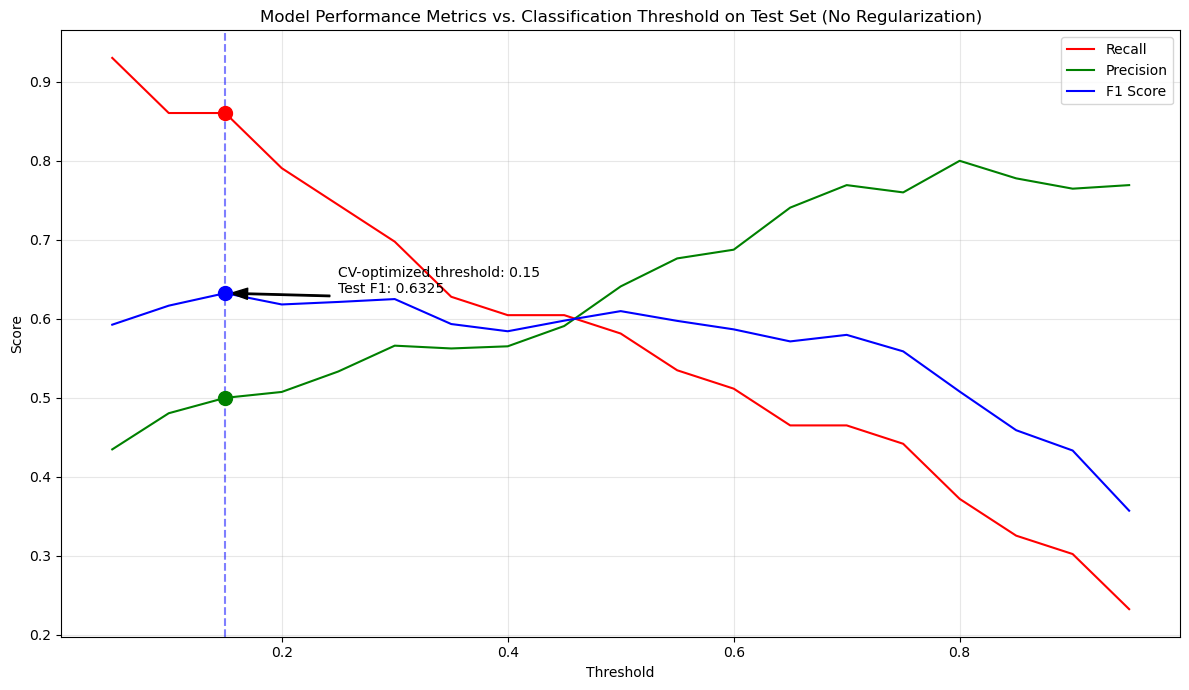

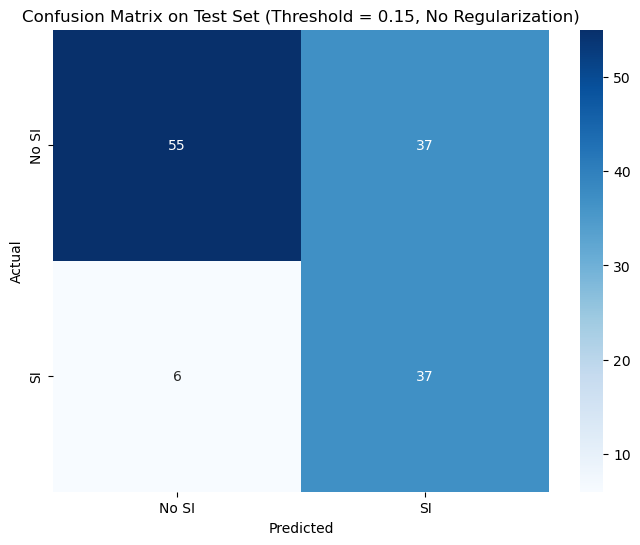

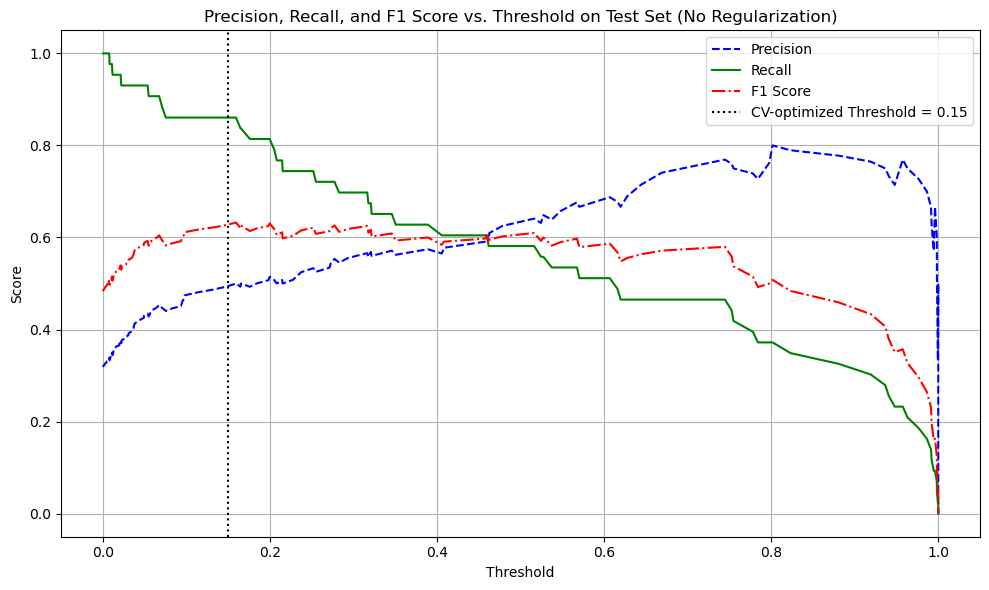


========== MODEL PERFORMANCE SUMMARY (NO REGULARIZATION) ==========
Model: LogisticRegression(penalty='none', solver='lbfgs')
Best Threshold (from CV): 0.15

Test Set Performance:
F1 Score: 0.6325
Recall: 0.8605
Precision: 0.5000

AUC-ROC: 0.7892

Confusion Matrix on Test Set:
True Negatives: 55
False Positives: 37
False Negatives: 6
True Positives: 37

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        92
           1       0.50      0.86      0.63        43

    accuracy                           0.68       135
   macro avg       0.70      0.73      0.68       135
weighted avg       0.77      0.68      0.69       135


========== FEATURE IMPORTANCE (NO REGULARIZATION) ==========


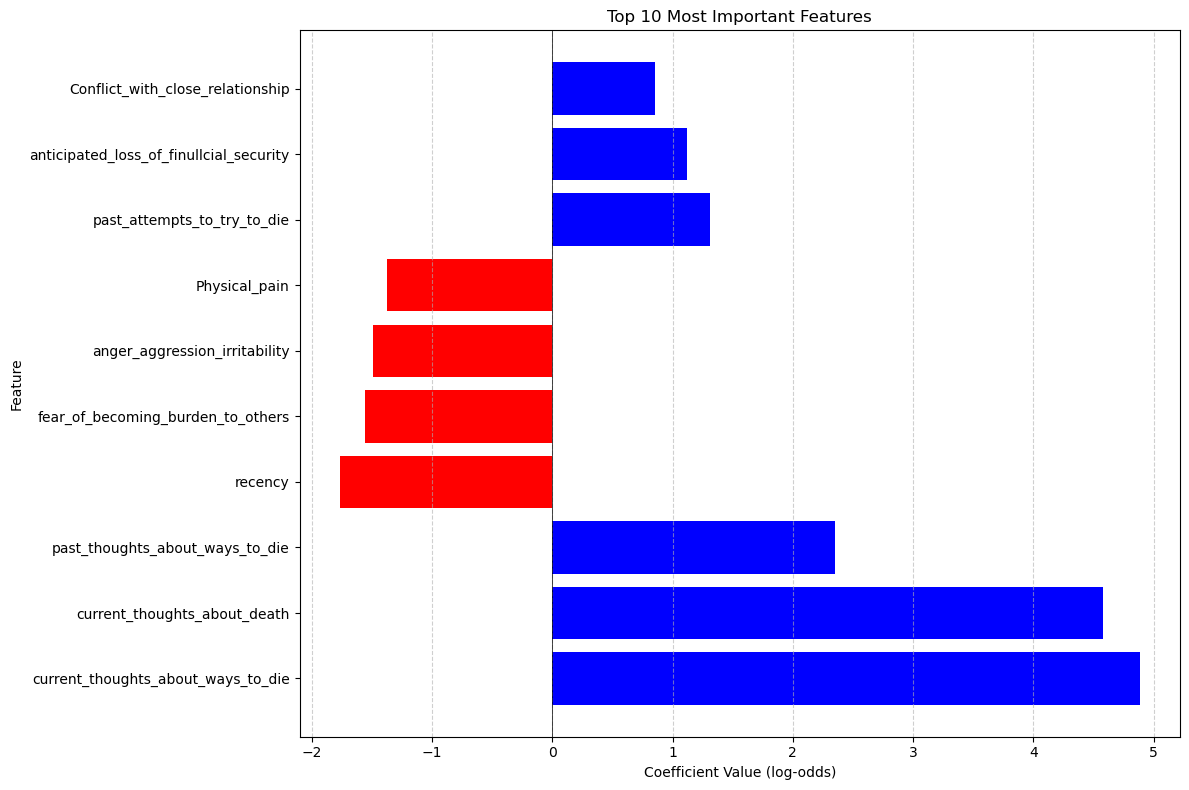


Top 10 Most Important Features:
                                    Feature  Coefficient
5        current_thoughts_about_ways_to_die     4.884948
4              current_thoughts_about_death     4.574888
1           past_thoughts_about_ways_to_die     2.347121
21                                  recency    -1.767278
16        fear_of_becoming_burden_to_others    -1.558687
10            anger_aggression_irritability    -1.486217
20                            Physical_pain    -1.373576
2               past_attempts_to_try_to_die     1.314398
15  anticipated_loss_of_finullcial_security     1.123081
19         Conflict_with_close_relationship     0.850806


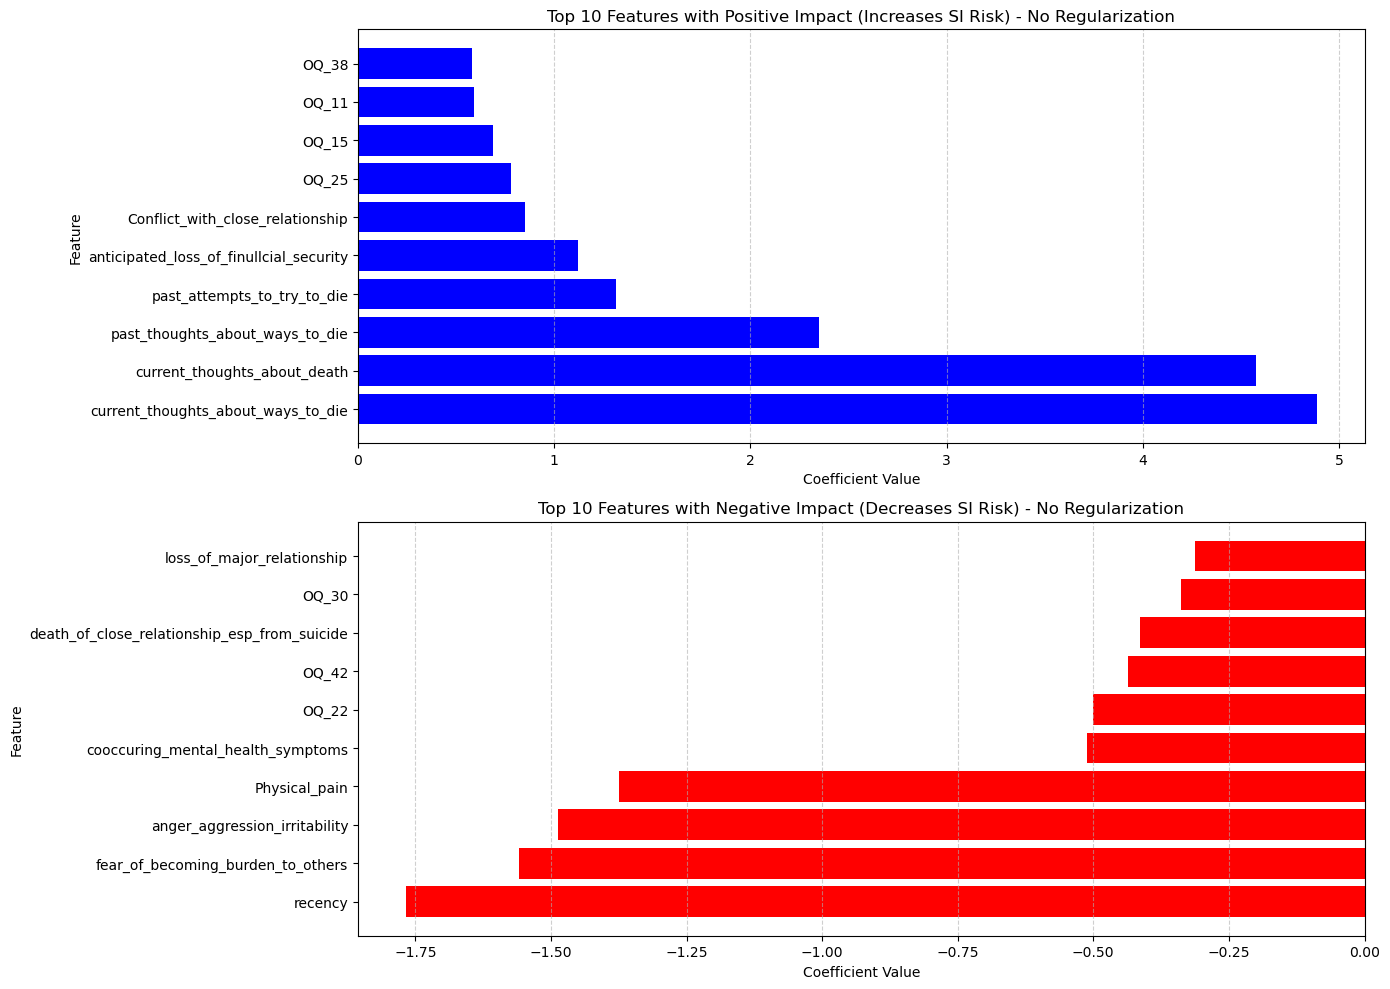

In [31]:
# Logistic regression without any regularization

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix,
                            classification_report, roc_auc_score, precision_recall_curve)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from sklearn.preprocessing import StandardScaler
# Suppress warnings
warnings.filterwarnings('ignore')

# Keep the scale_oq_features function (unchanged)
def scale_oq_features(X_train, X_test=None, X_val=None):
    """
    Scale features that start with 'OQ_' using StandardScaler
    
    Parameters:
    - X_train: Training features DataFrame
    - X_test: Test features DataFrame (optional)
    - X_val: Validation features DataFrame (optional)
    
    Returns:
    - Scaled DataFrames in same order as input
    """
    # Create a copy of the DataFrames to avoid modifying originals
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy() if X_test is not None else None
    X_val_scaled = X_val.copy() if X_val is not None else None
    
    # Get list of OQ_ features
    oq_features = [col for col in X_train.columns if col.startswith('OQ_')]
    
    if len(oq_features) > 0:
        print(f"Scaling {len(oq_features)} OQ_ features...")
        
        # Initialize scaler
        scaler = StandardScaler()
        
        # Fit scaler on training data and transform
        X_train_scaled[oq_features] = scaler.fit_transform(X_train[oq_features])
        
        # Transform test data if provided
        if X_test is not None:
            X_test_scaled[oq_features] = scaler.transform(X_test[oq_features])
        
        # Transform validation data if provided
        if X_val is not None:
            X_val_scaled[oq_features] = scaler.transform(X_val[oq_features])
    else:
        print("No OQ_ features found to scale")
    
    if X_test is not None and X_val is not None:
        return X_train_scaled, X_test_scaled, X_val_scaled
    elif X_test is not None:
        return X_train_scaled, X_test_scaled
    else:
        return X_train_scaled

# Apply scaling to features before training models
X_train, X_test = scale_oq_features(X_train, X_test)

# ========== LOGISTIC REGRESSION WITHOUT REGULARIZATION ==========
print("\n========== LOGISTIC REGRESSION WITHOUT REGULARIZATION ==========")

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model with no regularization
# We'll use 'lbfgs' solver which works with penalty='none'
model = LogisticRegression(
    penalty=None,  # No regularization
    solver='lbfgs',  # Compatible solver for no penalty
    max_iter=1000,
    random_state=42
)

# Track threshold performance across folds
print("Performing 5-fold cross-validation with threshold optimization...")
threshold_f1_scores = {t: [] for t in thresholds}

# Perform k-fold cross-validation to find best threshold
for train_idx, val_idx in kf.split(X_train):
    # Split data for this fold
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Scale OQ features if needed
    X_fold_train, X_fold_val = scale_oq_features(X_fold_train, X_fold_val)
    
    # Fit model
    model.fit(X_fold_train, y_fold_train)
    
    # Get probabilities for validation set
    y_fold_probs = model.predict_proba(X_fold_val)[:, 1]
    
    # Try different thresholds
    for threshold in thresholds:
        # Apply threshold
        y_fold_pred = (y_fold_probs >= threshold).astype(int)
        
        # Calculate F1 score
        fold_f1 = f1_score(y_fold_val, y_fold_pred)
        
        # Store this threshold's performance for this fold
        threshold_f1_scores[threshold].append(fold_f1)

# Calculate average F1 score for each threshold across all folds
avg_f1_by_threshold = {t: np.mean(scores) for t, scores in threshold_f1_scores.items()}

# Find best threshold
best_threshold = max(avg_f1_by_threshold, key=avg_f1_by_threshold.get)
best_avg_f1 = avg_f1_by_threshold[best_threshold]

# Show best threshold from CV
print(f"\nBest threshold from cross-validation: {best_threshold:.2f}")
print(f"Average CV F1 score at best threshold: {best_avg_f1:.4f}")

# ========== TRAIN FINAL MODEL ==========
print("\n========== TRAINING FINAL MODEL WITHOUT REGULARIZATION ==========")

# Train final model on all training data
final_model = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train, y_train)

# ========== EVALUATE ON TEST SET ==========
print("\n========== EVALUATING ON TEST SET ==========")
# Get probability predictions on test set
test_probs = final_model.predict_proba(X_test)[:, 1]

# Apply the best threshold determined during cross-validation
y_pred_best = (test_probs >= best_threshold).astype(int)

# Calculate metrics
test_recall = recall_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best, zero_division=0)
test_f1 = f1_score(y_test, y_pred_best)
test_cm = confusion_matrix(y_test, y_pred_best)

# Display results with best threshold
print(f"Test Set Performance with Best Threshold ({best_threshold:.2f}):")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# ========== VISUALIZATION ==========
# Calculate metrics for each threshold (for visualization)
threshold_metrics = {
    'threshold': [],
    'recall': [],
    'precision': [],
    'f1': [],
    'tn': [],
    'fp': [],
    'fn': [],
    'tp': []
}

# Calculate metrics for each threshold
for threshold in thresholds:
    # Apply threshold
    y_pred = (test_probs >= threshold).astype(int)
    
    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store metrics
    threshold_metrics['threshold'].append(threshold)
    threshold_metrics['recall'].append(recall)
    threshold_metrics['precision'].append(precision)
    threshold_metrics['f1'].append(f1)
    
    # Store confusion matrix elements
    if cm.shape == (2, 2):
        threshold_metrics['tn'].append(cm[0, 0])
        threshold_metrics['fp'].append(cm[0, 1])
        threshold_metrics['fn'].append(cm[1, 0])
        threshold_metrics['tp'].append(cm[1, 1])
    else:
        # Handle case where one class might be missing in predictions
        threshold_metrics['tn'].append(0)
        threshold_metrics['fp'].append(0)
        threshold_metrics['fn'].append(0)
        threshold_metrics['tp'].append(0)

# Create DataFrame from metrics
metrics_df = pd.DataFrame(threshold_metrics)

# Plot metrics vs threshold
plt.figure(figsize=(12, 7))
plt.plot(metrics_df['threshold'], metrics_df['recall'], 'r-', label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['precision'], 'g-', label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['f1'], 'b-', label='F1 Score')

# Mark best threshold (determined during CV)
plt.axvline(x=best_threshold, color='blue', linestyle='--', alpha=0.5)
plt.scatter(best_threshold, test_f1, color='blue', s=100, zorder=5)
plt.scatter(best_threshold, test_recall, color='red', s=100, zorder=5)
plt.scatter(best_threshold, test_precision, color='green', s=100, zorder=5)

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics vs. Classification Threshold on Test Set (No Regularization)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.annotate(f'CV-optimized threshold: {best_threshold:.2f}\nTest F1: {test_f1:.4f}',
             xy=(best_threshold, test_f1),
             xytext=(best_threshold+0.1, test_f1),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10)
plt.tight_layout()
plt.show()

# Create confusion matrix for test set with best threshold
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on Test Set (Threshold = {best_threshold:.2f}, No Regularization)')
plt.show()

# Create precision-recall curve
plt.figure(figsize=(10, 6))
precision, recall, thresholds_pr = precision_recall_curve(y_test, test_probs)

# Calculate F1 score for each threshold
f1_scores = [2 * p * r / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision[:-1], recall[:-1])]

# Plot precision, recall, and F1 curves
plt.plot(thresholds_pr, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds_pr, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds_pr, f1_scores, 'r-.', label='F1 Score')

# Mark the best threshold
plt.axvline(x=best_threshold, color='k', linestyle=':', 
           label=f'CV-optimized Threshold = {best_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold on Test Set (No Regularization)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== PERFORMANCE SUMMARY ==========
print("\n========== MODEL PERFORMANCE SUMMARY (NO REGULARIZATION) ==========")
print(f"Model: LogisticRegression(penalty='none', solver='lbfgs')")
print(f"Best Threshold (from CV): {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, test_probs)
print(f"\nAUC-ROC: {auc_roc:.4f}")

# Print confusion matrix components
print("\nConfusion Matrix on Test Set:")
print(f"True Negatives: {test_cm[0, 0]}")
print(f"False Positives: {test_cm[0, 1]}")
print(f"False Negatives: {test_cm[1, 0]}")
print(f"True Positives: {test_cm[1, 1]}")

# Print classification report at best threshold
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_best))

# ========== FEATURE IMPORTANCE ==========
print("\n========== FEATURE IMPORTANCE (NO REGULARIZATION) ==========")
# Get feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_model.coef_[0],
    'Abs_Coefficient': np.abs(final_model.coef_[0])
})
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top 10 features
plt.figure(figsize=(12, 8))
top_features = coef_df.head(10)
colors = ['red' if c < 0 else 'blue' for c in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value (log-odds)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(coef_df[['Feature', 'Coefficient']].head(10))

# Plot features with positive and negative coefficients separately
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
pos_features = coef_df[coef_df['Coefficient'] > 0].head(10)
plt.barh(pos_features['Feature'], pos_features['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features with Positive Impact (Increases SI Risk) - No Regularization')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.subplot(2, 1, 2)
neg_features = coef_df[coef_df['Coefficient'] < 0].head(10)
plt.barh(neg_features['Feature'], neg_features['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features with Negative Impact (Decreases SI Risk) - No Regularization')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Scaling 44 OQ_ features...

========== LIKELIHOOD RATIO TEST: FULL MODEL VS OQ_ FEATURES ONLY ==========
Full model uses 66 features
Reduced model uses 44 OQ_ features only

Finding optimal threshold for full model...
Best threshold (full model): 0.20, CV F1: 0.5575

Finding optimal threshold for reduced model (OQ_ features only)...
Best threshold (reduced model): 0.35, CV F1: 0.5799

========== TRAINING FINAL MODELS ==========

========== PERFORMING LIKELIHOOD RATIO TEST ==========
Full model log-likelihood: -153.5809
Reduced model log-likelihood: -174.4314
Likelihood ratio test statistic: 41.7008
Degrees of freedom: 22
P-value: 0.00679317

Result: The full model is significantly better than the reduced model (p < 0.05)
The non-OQ_ features add significant predictive value.

========== EVALUATING BOTH MODELS ON TEST SET ==========

Test Set Performance Comparison:
           Full Model  OQ_ Features Only
F1           0.618182           0.606061
Precision    0.507463           0.535714

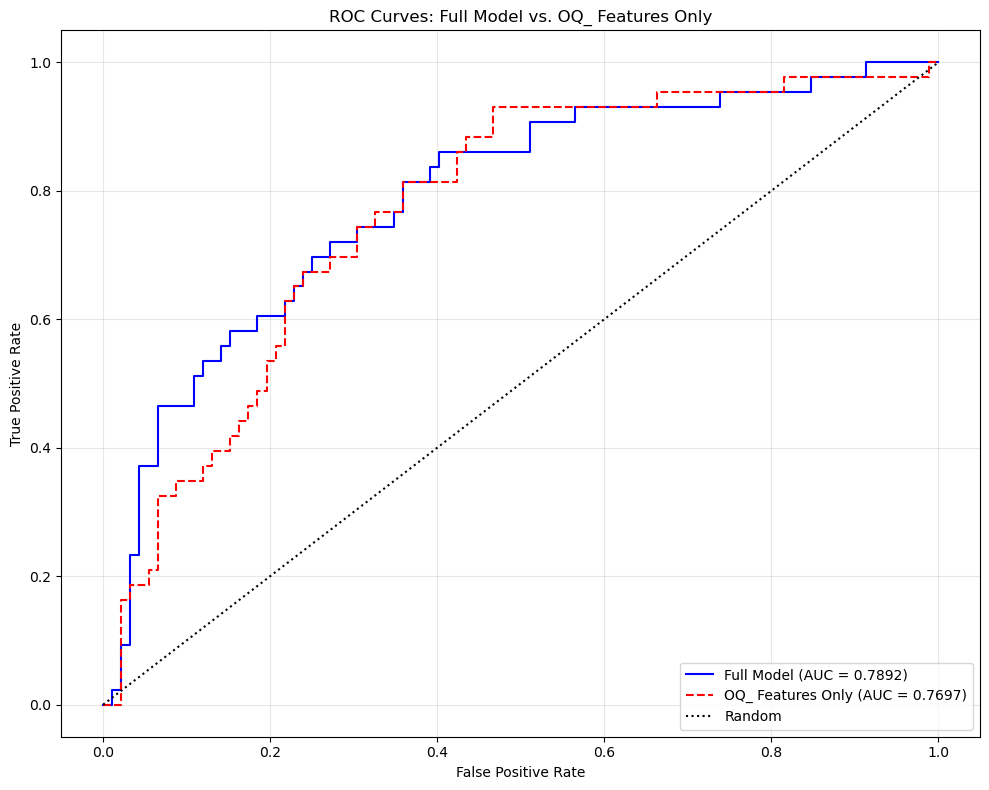

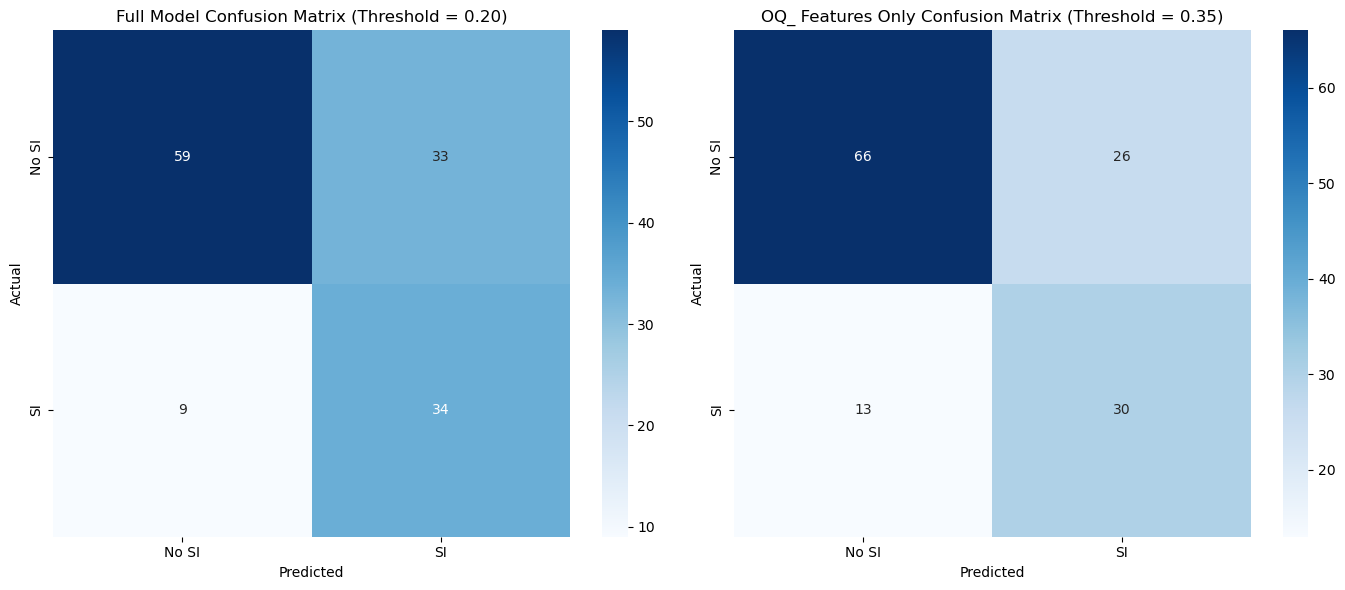

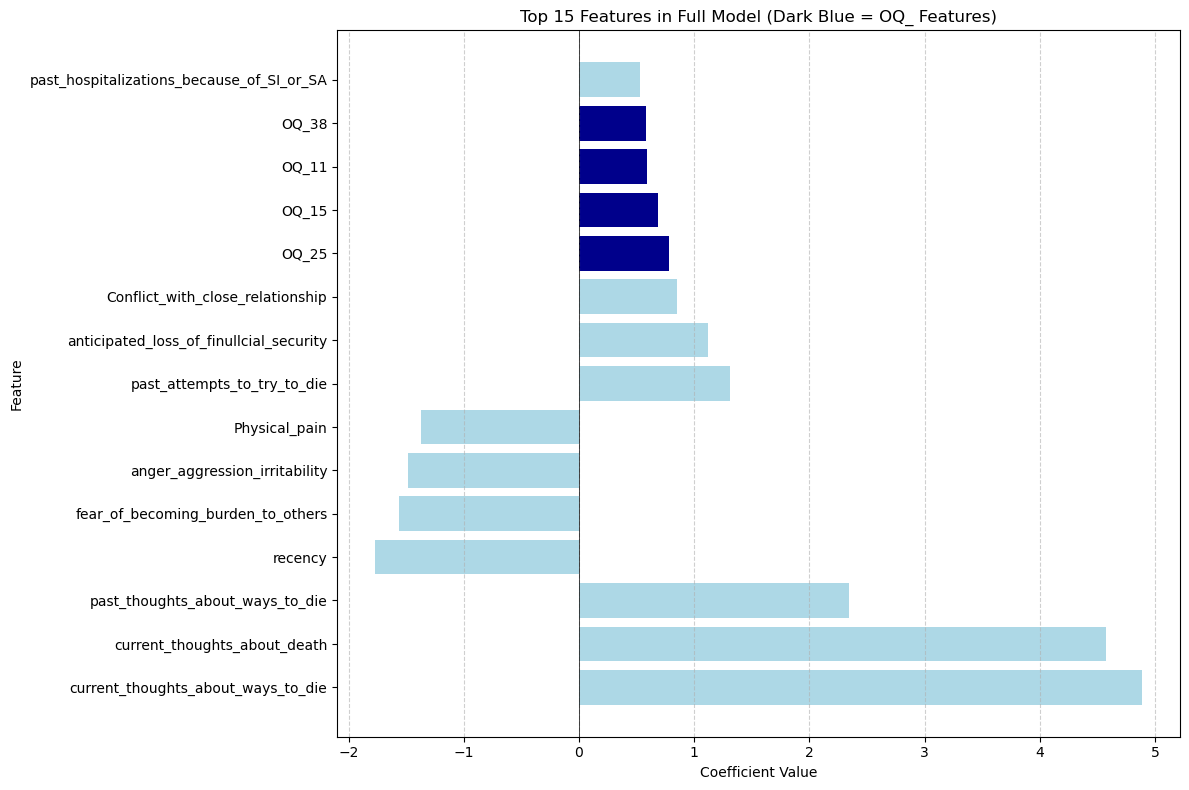


========== MODEL COMPARISON SUMMARY ==========
1. Likelihood Ratio Test p-value: 0.00679317
   Interpretation: Full model is significantly better

2. Test Set Performance:
   Full Model F1: 0.6182, AUC: 0.7892
   OQ_ Only Model F1: 0.6061, AUC: 0.7697
   Difference in F1: 0.0121
   Difference in AUC: 0.0195

3. Feature Importance: 0 out of top 10 features are OQ_ features

========== OQ_ FEATURES COEFFICIENTS ==========
   Feature  Coefficient
45   OQ_25     0.777456
35   OQ_15     0.685784
31   OQ_11     0.591345
58   OQ_38     0.580861
42   OQ_22    -0.500123
24    OQ_3     0.456277
62   OQ_42    -0.435855
46   OQ_26     0.419815
38   OQ_18     0.403961
60   OQ_40     0.379375


In [30]:
### Model comparison

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix,
                             classification_report, roc_auc_score, precision_recall_curve,
                             log_loss)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2
# Suppress warnings
warnings.filterwarnings('ignore')

# Keep the scale_oq_features function (unchanged)
def scale_oq_features(X_train, X_test=None, X_val=None):
    """
    Scale features that start with 'OQ_' using StandardScaler
    
    Parameters:
    - X_train: Training features DataFrame
    - X_test: Test features DataFrame (optional)
    - X_val: Validation features DataFrame (optional)
    
    Returns:
    - Scaled DataFrames in same order as input
    """
    # Create a copy of the DataFrames to avoid modifying originals
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy() if X_test is not None else None
    X_val_scaled = X_val.copy() if X_val is not None else None
    
    # Get list of OQ_ features
    oq_features = [col for col in X_train.columns if col.startswith('OQ_')]
    
    if len(oq_features) > 0:
        print(f"Scaling {len(oq_features)} OQ_ features...")
        
        # Initialize scaler
        scaler = StandardScaler()
        
        # Fit scaler on training data and transform
        X_train_scaled[oq_features] = scaler.fit_transform(X_train[oq_features])
        
        # Transform test data if provided
        if X_test is not None:
            X_test_scaled[oq_features] = scaler.transform(X_test[oq_features])
        
        # Transform validation data if provided
        if X_val is not None:
            X_val_scaled[oq_features] = scaler.transform(X_val[oq_features])
    else:
        print("No OQ_ features found to scale")
    
    if X_test is not None and X_val is not None:
        return X_train_scaled, X_test_scaled, X_val_scaled
    elif X_test is not None:
        return X_train_scaled, X_test_scaled
    else:
        return X_train_scaled

# Apply scaling to features
X_train_scaled, X_test_scaled = scale_oq_features(X_train, X_test)

# ========== FITTING MODELS FOR LIKELIHOOD RATIO TEST ==========
print("\n========== LIKELIHOOD RATIO TEST: FULL MODEL VS OQ_ FEATURES ONLY ==========")

# Extract OQ_ features only
oq_features = [col for col in X_train.columns if col.startswith('OQ_')]
X_train_oq = X_train_scaled[oq_features]
X_test_oq = X_test_scaled[oq_features]

print(f"Full model uses {X_train.shape[1]} features")
print(f"Reduced model uses {len(oq_features)} OQ_ features only")

# Function to find optimal threshold via cross-validation
def find_best_threshold(X_data, y_data, model, thresholds=np.arange(0.05, 1.0, 0.05), n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    threshold_f1_scores = {t: [] for t in thresholds}
    
    for train_idx, val_idx in kf.split(X_data):
        # Split data for this fold
        X_fold_train, X_fold_val = X_data.iloc[train_idx], X_data.iloc[val_idx]
        y_fold_train, y_fold_val = y_data.iloc[train_idx], y_data.iloc[val_idx]
        
        # Fit model
        model.fit(X_fold_train, y_fold_train)
        
        # Get probabilities for validation set
        y_fold_probs = model.predict_proba(X_fold_val)[:, 1]
        
        # Try different thresholds
        for threshold in thresholds:
            # Apply threshold
            y_fold_pred = (y_fold_probs >= threshold).astype(int)
            
            # Calculate F1 score
            fold_f1 = f1_score(y_fold_val, y_fold_pred)
            
            # Store this threshold's performance for this fold
            threshold_f1_scores[threshold].append(fold_f1)
    
    # Calculate average F1 score for each threshold across all folds
    avg_f1_by_threshold = {t: np.mean(scores) for t, scores in threshold_f1_scores.items()}
    
    # Find best threshold
    best_threshold = max(avg_f1_by_threshold, key=avg_f1_by_threshold.get)
    best_avg_f1 = avg_f1_by_threshold[best_threshold]
    
    return best_threshold, best_avg_f1

# Initialize models without regularization
full_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)
reduced_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)

# Find optimal thresholds through CV
print("\nFinding optimal threshold for full model...")
full_best_threshold, full_best_f1 = find_best_threshold(X_train_scaled, y_train, full_model)
print(f"Best threshold (full model): {full_best_threshold:.2f}, CV F1: {full_best_f1:.4f}")

print("\nFinding optimal threshold for reduced model (OQ_ features only)...")
reduced_best_threshold, reduced_best_f1 = find_best_threshold(X_train_oq, y_train, reduced_model)
print(f"Best threshold (reduced model): {reduced_best_threshold:.2f}, CV F1: {reduced_best_f1:.4f}")

# ========== TRAIN FINAL MODELS ==========
print("\n========== TRAINING FINAL MODELS ==========")

# Fit full model
full_model.fit(X_train_scaled, y_train)

# Fit reduced model
reduced_model.fit(X_train_oq, y_train)

# ========== LIKELIHOOD RATIO TEST ==========
print("\n========== PERFORMING LIKELIHOOD RATIO TEST ==========")

# Calculate log-likelihoods (we need negative log-loss as log-likelihood)
# For full model on training data
full_probs = full_model.predict_proba(X_train_scaled)
full_log_loss = log_loss(y_train, full_probs)
full_log_likelihood = -full_log_loss * len(y_train)

# For reduced model on training data
reduced_probs = reduced_model.predict_proba(X_train_oq)
reduced_log_loss = log_loss(y_train, reduced_probs)
reduced_log_likelihood = -reduced_log_loss * len(y_train)

# Calculate LRT statistic: 2 * (log-likelihood of full model - log-likelihood of reduced model)
lr_statistic = 2 * (full_log_likelihood - reduced_log_likelihood)

# Calculate degrees of freedom: difference in number of parameters
df = X_train_scaled.shape[1] - X_train_oq.shape[1]

# Calculate p-value
p_value = chi2.sf(lr_statistic, df)

print(f"Full model log-likelihood: {full_log_likelihood:.4f}")
print(f"Reduced model log-likelihood: {reduced_log_likelihood:.4f}")
print(f"Likelihood ratio test statistic: {lr_statistic:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.8f}")

if p_value < 0.05:
    print("\nResult: The full model is significantly better than the reduced model (p < 0.05)")
    print("The non-OQ_ features add significant predictive value.")
else:
    print("\nResult: The full model is NOT significantly better than the reduced model (p >= 0.05)")
    print("The non-OQ_ features do not add significant predictive value.")

# ========== EVALUATE MODELS ON TEST SET ==========
print("\n========== EVALUATING BOTH MODELS ON TEST SET ==========")

# Full model predictions
full_test_probs = full_model.predict_proba(X_test_scaled)[:, 1]
full_test_preds = (full_test_probs >= full_best_threshold).astype(int)

# Reduced model predictions
reduced_test_probs = reduced_model.predict_proba(X_test_oq)[:, 1]
reduced_test_preds = (reduced_test_probs >= reduced_best_threshold).astype(int)

# Calculate metrics for full model
full_test_metrics = {
    'F1': f1_score(y_test, full_test_preds),
    'Precision': precision_score(y_test, full_test_preds),
    'Recall': recall_score(y_test, full_test_preds),
    'AUC-ROC': roc_auc_score(y_test, full_test_probs)
}

# Calculate metrics for reduced model
reduced_test_metrics = {
    'F1': f1_score(y_test, reduced_test_preds),
    'Precision': precision_score(y_test, reduced_test_preds),
    'Recall': recall_score(y_test, reduced_test_preds),
    'AUC-ROC': roc_auc_score(y_test, reduced_test_probs)
}

# Display results in a table
metrics_df = pd.DataFrame({
    'Full Model': full_test_metrics,
    'OQ_ Features Only': reduced_test_metrics
})

print("\nTest Set Performance Comparison:")
print(metrics_df)

# Calculate confusion matrices
full_cm = confusion_matrix(y_test, full_test_preds)
reduced_cm = confusion_matrix(y_test, reduced_test_preds)

# ========== VISUALIZATIONS ==========
# Plot ROC curves for both models
plt.figure(figsize=(10, 8))
from sklearn.metrics import roc_curve

# ROC curve for full model
fpr_full, tpr_full, _ = roc_curve(y_test, full_test_probs)
plt.plot(fpr_full, tpr_full, 'b-', label=f'Full Model (AUC = {full_test_metrics["AUC-ROC"]:.4f})')

# ROC curve for reduced model
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, reduced_test_probs)
plt.plot(fpr_reduced, tpr_reduced, 'r--', label=f'OQ_ Features Only (AUC = {reduced_test_metrics["AUC-ROC"]:.4f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k:', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Full Model vs. OQ_ Features Only')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot confusion matrices side by side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(full_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Full Model Confusion Matrix (Threshold = {full_best_threshold:.2f})')

plt.subplot(1, 2, 2)
sns.heatmap(reduced_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'OQ_ Features Only Confusion Matrix (Threshold = {reduced_best_threshold:.2f})')

plt.tight_layout()
plt.show()

# Compare feature importance for full model
plt.figure(figsize=(12, 8))
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': full_model.coef_[0],
    'Abs_Coefficient': np.abs(full_model.coef_[0])
})
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Highlight OQ_ features
is_oq = [col.startswith('OQ_') for col in coef_df['Feature']]
colors = ['darkblue' if oq else 'lightblue' for oq in is_oq]

top_features = coef_df.head(15)
is_oq_top = [col.startswith('OQ_') for col in top_features['Feature']]
colors_top = ['darkblue' if oq else 'lightblue' for oq in is_oq_top]

plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors_top)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Features in Full Model (Dark Blue = OQ_ Features)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Create a summary of model comparison
print("\n========== MODEL COMPARISON SUMMARY ==========")
print(f"1. Likelihood Ratio Test p-value: {p_value:.8f}")
print("   Interpretation: " + ("Full model is significantly better" if p_value < 0.05 else "No significant difference"))
print("\n2. Test Set Performance:")
print(f"   Full Model F1: {full_test_metrics['F1']:.4f}, AUC: {full_test_metrics['AUC-ROC']:.4f}")
print(f"   OQ_ Only Model F1: {reduced_test_metrics['F1']:.4f}, AUC: {reduced_test_metrics['AUC-ROC']:.4f}")
print(f"   Difference in F1: {full_test_metrics['F1'] - reduced_test_metrics['F1']:.4f}")
print(f"   Difference in AUC: {full_test_metrics['AUC-ROC'] - reduced_test_metrics['AUC-ROC']:.4f}")

# Calculate number of OQ_ features in top N features
top_n = 10
oq_in_top_n = sum(1 for f in coef_df.head(top_n)['Feature'] if f.startswith('OQ_'))
print(f"\n3. Feature Importance: {oq_in_top_n} out of top {top_n} features are OQ_ features")

# Print OQ features coefficients
print("\n========== OQ_ FEATURES COEFFICIENTS ==========")
oq_coefficients = coef_df[coef_df['Feature'].str.startswith('OQ_')].sort_values('Abs_Coefficient', ascending=False)
print(oq_coefficients[['Feature', 'Coefficient']].head(10))

In [28]:
# Finding the AppointID of a random appointment that was a false negative

# Get the index of the false negatives

fn_index = (y_test_class == 1) & (y_pred == 0)

# Get the AppointID of the first false negative

fn_AppointID = X_test[fn_index].index[2]

# Get the row from the original DataFrame

appoint = df.loc[df.index == fn_AppointID, 'AppointID']

print(appoint)

# After checking first index 0 it looks like they indicated not a 1 on OQ and not 0, no mention of SI in note
# checking index 1 the note said "reduction in si", model didn't mark current thoughts about death

NameError: name 'y_test_class' is not defined

In [30]:
# finding an example where 'current_intent_to_try_to_die' is 1

df[df['current_intent_to_try_to_die']==1]

,row,ID,AppointID,past_thoughts_about_death,past_thoughts_about_ways_to_die,past_attempts_to_try_to_die,past_hospitalizations_because_of_SI_or_SA,current_thoughts_about_death,current_thoughts_about_ways_to_die,current_intent_to_try_to_die,...,death_of_close_relationship_esp_from_suicide,fear_of_punishment,anticipated_loss_of_finullcial_security,fear_of_becoming_burden_to_others,?Self_critical_thoughts?,?Frustration?,?Conflict_with_close_relationship?,?Physical_pain?,recency,SI
711,711,199415776.0,1157980.0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,4.0
880,880,123752495.0,890993.0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,3.0


## The last thing we are going to do is compare the presence of SI as suggested by the OQ questionarre and by the model

In [95]:
# identify which rows indicate SI according to the model. This is rows where current ideation is taking place

condition_with_1 = (no_id["current_thoughts_about_death"] == 1) | (no_id["current_thoughts_about_ways_to_die"] == 1) | (no_id["current_intent_to_try_to_die"] == 1)
condition_with_0 = ~condition_with_1

mod_si = no_id.loc[condition_with_1, 'SI']
mod_no_si = no_id.loc[condition_with_0, 'SI']

# Get the rows where the OQ indicates SI
oq_si = df.loc[df['SI'] > 0, 'SI']
oq_no_si = df.loc[df['SI'] == 0, 'SI']

# performing McNemar's test

from statsmodels.stats.contingency_tables import mcnemar

# Create a contingency table
contingency = pd.crosstab(no_id['SI'] > 0, condition_with_1)

print(contingency)

# perform McNemar's test
result = mcnemar(contingency, exact=False)

print(f'Statistic: {result.statistic}')
print(f'p-value: {result.pvalue}')


col_0  False  True 
SI                 
False    463      3
True     185     32
Statistic: 174.26063829787233
p-value: 8.682927356262945e-40
